<div style="float:left">
    <h1 style="width:600px">Assessment</h1>
    <h3 style="width:600px">CASA0002: Urban Simulation</h3>
    <h3 style="width:600px">Author: Andres Restrepo</h3>

</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

## Required libraries

In [1]:
import timeit
start_time = timeit.default_timer()
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
from math import sqrt
# from pandas.table.plotting import table

## Data reading

### Underground network

In [2]:
G = nx.read_graphml('Data/Inputs/london.graph')

In [3]:
type(G)

networkx.classes.graph.Graph

### OD matrix

In [4]:
OD = pd.read_csv('Data/Inputs/OD_matrix.csv',index_col='station_origin')
OD.rename_axis('station_destination', axis=1,inplace=True)

In [5]:
type(OD)

pandas.core.frame.DataFrame

### Flow data

In [6]:
london_OD_AMpeak = pd.read_csv('Data/Inputs/london_flows.csv')

In [7]:
type(london_OD_AMpeak)

pandas.core.frame.DataFrame

## Data inspection

### Underground network

In [8]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_4330/2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [9]:
list(G.nodes(data = True))[0]

('Liverpool Street', {'coords': '(533127.7645573226, 181621.32983581326)'})

In [10]:
# #check that all distances are greater or equal to euclidean distance
# for u,v, data in G.edges(data=True):
#     assert(data['length'] >= distance.euclidean(pos[u], pos[v]))

In [11]:
#if want to know what is the maximum distance between stations
max(dict(G.edges).items(), key=lambda x: x[1]['length'])

(('Wembley Park', 'Finchley Road'),
 {'length': 7266.373927496304, 'line_name': 'Metropolitan', 'flows': 55124})

In [12]:
#if want to know to which stations Baker Street is directly connected to
Baker_Street = [(u,v) for  u,v in G.edges() if u == 'Baker Street' or v == 'Baker Street']
Baker_Street

[('Bond Street', 'Baker Street'),
 ('Baker Street', 'Great Portland Street'),
 ('Baker Street', 'Edgware Road'),
 ('Baker Street', 'Finchley Road'),
 ('Baker Street', 'Marylebone'),
 ('Baker Street', "Regent's Park"),
 ('Baker Street', "St. John's Wood")]

In [13]:
#if want to know to which stations Baker Street is directly connected to
Stratford = [(u,v) for  u,v in G.edges() if u == 'Stratford' or v == 'Stratford']
Stratford

[('Liverpool Street', 'Stratford'),
 ('Stratford', 'Maryland'),
 ('Stratford', 'Mile End'),
 ('Stratford', 'Leyton'),
 ('Stratford', 'Stratford High Street'),
 ('Stratford', 'Pudding Mill Lane'),
 ('Stratford', 'Stratford International'),
 ('Stratford', 'Hackney Wick'),
 ('Stratford', 'West Ham')]

In [14]:
#We can also check the degree of the nodes in our network and check that they make sense
deg_london = nx.degree(G)

In [15]:
df = pd.DataFrame(index = dict(deg_london).keys())
df['degree'] = dict(deg_london).values()

In [16]:
df.sort_values('degree', ascending =False).head(20)

,degree
Stratford,9
Bank and Monument,8
Baker Street,7
King's Cross St. Pancras,7
Liverpool Street,6
Green Park,6
Waterloo,6
West Ham,6
Oxford Circus,6
Canning Town,6


The inspecting results are consistent with the results of Practical 10.

### OD matrix

In [17]:
OD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, Abbey Road to All
Columns: 400 entries, Abbey Road to All
dtypes: int64(400)
memory usage: 1.2+ MB


In [18]:
OD.head()

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32,599
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1224
Acton Town,0,0,0,3,17,0,35,0,0,11,...,77,3,6,9,0,0,0,0,0,3745
Aldgate,0,0,0,0,0,0,0,0,0,17,...,0,0,4,8,0,0,0,0,0,2886
Aldgate East,0,0,2,0,0,0,0,0,0,20,...,24,0,0,12,0,1,0,1,0,3172


The inspecting results are consistent with the results of Practical 10.

### Flow data

In [19]:
london_OD_AMpeak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61474 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61474 non-null  object 
 1   station_destination  61474 non-null  object 
 2   flows                61474 non-null  int64  
 3   population           61474 non-null  int64  
 4   jobs                 61474 non-null  int64  
 5   distance             61474 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.8+ MB


In [20]:
london_OD_AMpeak.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


The inspecting results are consistent with the results of Practical 10.

# London’s underground resilience

## Topological network

![img](https://tfl.gov.uk/cdn/static/cms/images/london-rail-and-tube-services-map.gif)

In [21]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [22]:
list(G.nodes(data = True))[0]

('Liverpool Street', {'coords': (533127.7645573226, 181621.32983581326)})

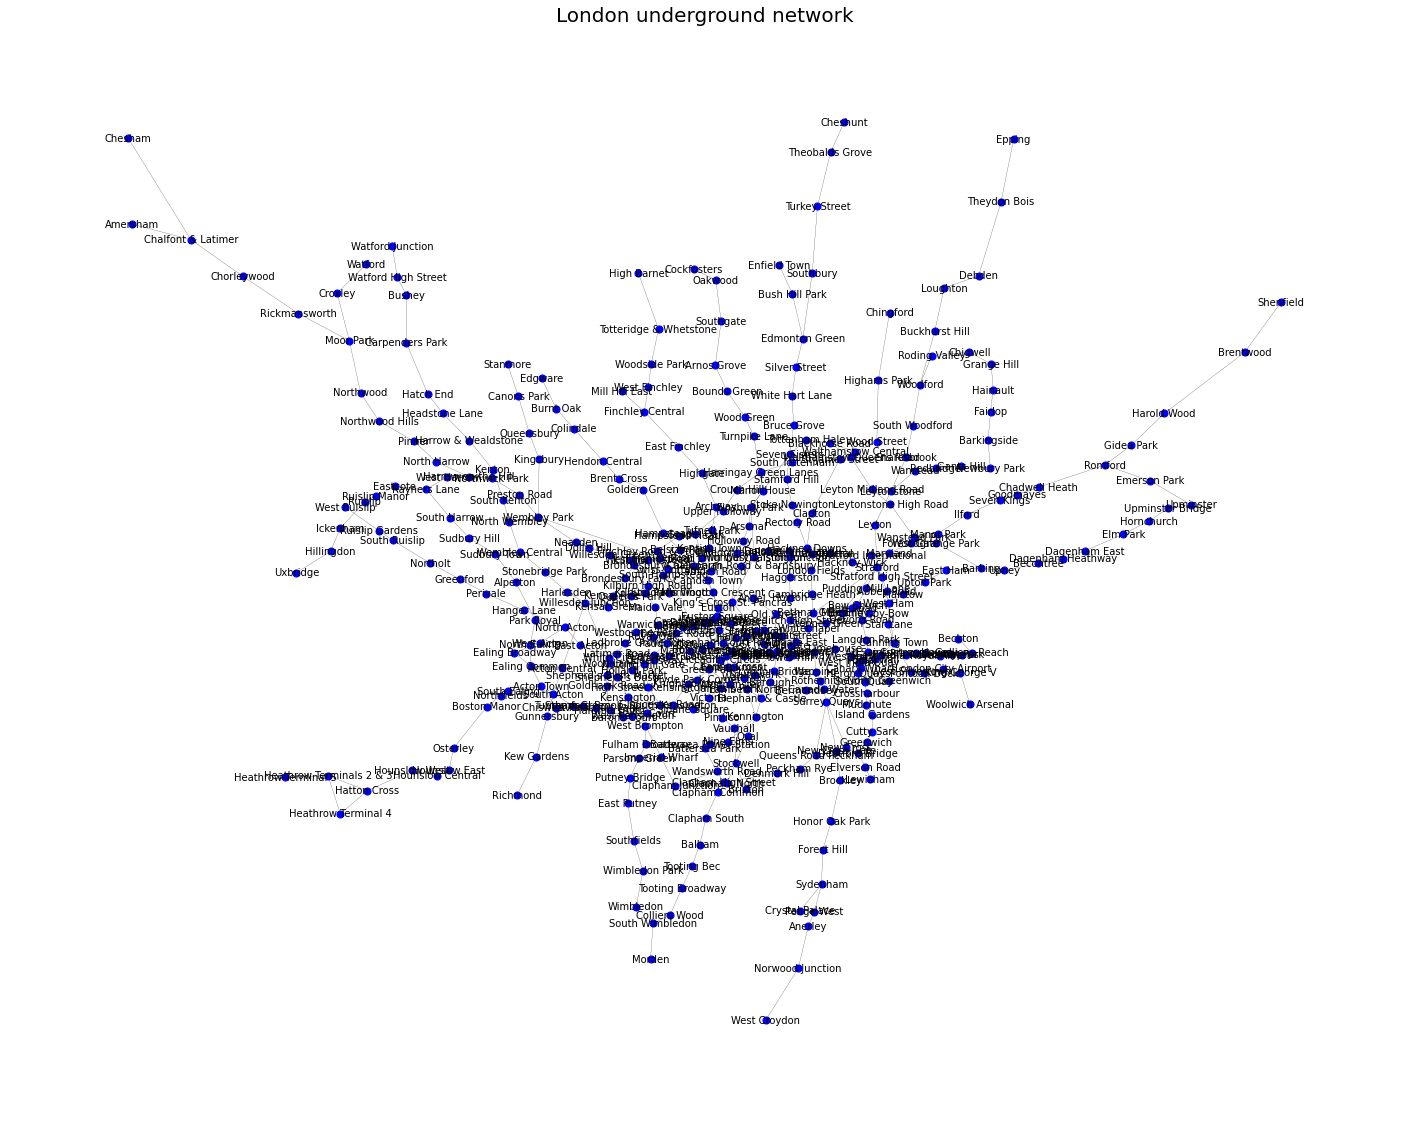

In [23]:
# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

pos = nx.get_node_attributes(G, 'coords')

# Nodes
nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
# Edges
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
# Labels
nx.draw_networkx_labels(G,pos, font_size=10, font_color='black')

plt.title("London underground network",fontsize=20)
plt.axis("off")
plt.show()

**It better to normalized to compare more easily?**

### Centrality measures

**Include eigen vector centrality?**

#### Calculation

In [24]:
df_centrality = pd.DataFrame(index=G.nodes())

deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')
df_centrality['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

clos_london = nx.closeness_centrality(G)
nx.set_node_attributes(G,clos_london,'closeness_t')
df_centrality['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

bet_london = nx.betweenness_centrality(G)
nx.set_node_attributes(G,bet_london,'betweenness_t')
df_centrality['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

eig_london = nx.eigenvector_centrality_numpy(G)
nx.set_node_attributes(G,bet_london,'eigenvector_t')
df_centrality['eigenvector_t'] = pd.Series(nx.get_node_attributes(G, 'eigenvector_t'))
# Change the tolerance value



In [25]:
df_centrality.head(10).sort_values(by=['degree'],ascending=False)

,degree,closeness_t,betweenness_t,eigenvector_t
Stratford,0.0225,0.104384,0.297846,0.297846
Liverpool Street,0.0150,0.110254,0.270807,0.270807
Romford,0.0075,0.059058,0.032774,0.032774
Maryland,0.0050,0.095193,0.063973,0.063973
Forest Gate,0.0050,0.087489,0.059337,0.059337
Manor Park,0.0050,0.080939,0.054700,0.054700
Ilford,0.0050,0.075301,0.050064,0.050064
Seven Kings,0.0050,0.070398,0.045427,0.045427
Goodmayes,0.0050,0.066094,0.040791,0.040791
Chadwell Heath,0.0050,0.062334,0.036217,0.036217


#### Degree centrality

In [26]:
df_centrality['degree'].sort_values(ascending=False)

Stratford                   0.0225
Bank and Monument           0.0200
Baker Street                0.0175
King's Cross St. Pancras    0.0175
Liverpool Street            0.0150
                             ...  
Watford Junction            0.0025
Cockfosters                 0.0025
Stratford International     0.0025
Wimbledon                   0.0025
Stanmore                    0.0025
Name: degree, Length: 401, dtype: float64

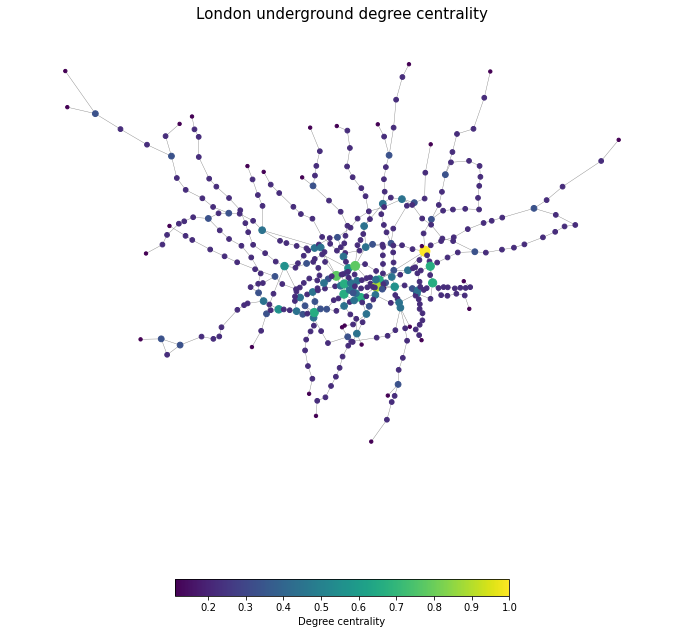

In [27]:
# Plot of degree centrality
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]
# Sclaling using the maximum value of the degree
deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
# Sclaling using the maximum value of the degree and multipling it by 50
deg_size=[(i[1]['degree']/(max(degree_values)))*100 for i in G.nodes(data=True)]


# Plot graph
pos=pos
fig, ax = plt.subplots(figsize=(12,12))
# Edges
nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
# Nodes
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground degree centrality",fontsize=15)
plt.show()

#### Closeness centrality

In [28]:
df_centrality['closeness_t'].sort_values(ascending=False)[0:10]

Green Park                  0.114778
Bank and Monument           0.113572
King's Cross St. Pancras    0.113443
Westminster                 0.112549
Waterloo                    0.112265
Oxford Circus               0.111204
Bond Street                 0.110988
Farringdon                  0.110742
Angel                       0.110742
Moorgate                    0.110314
Name: closeness_t, dtype: float64

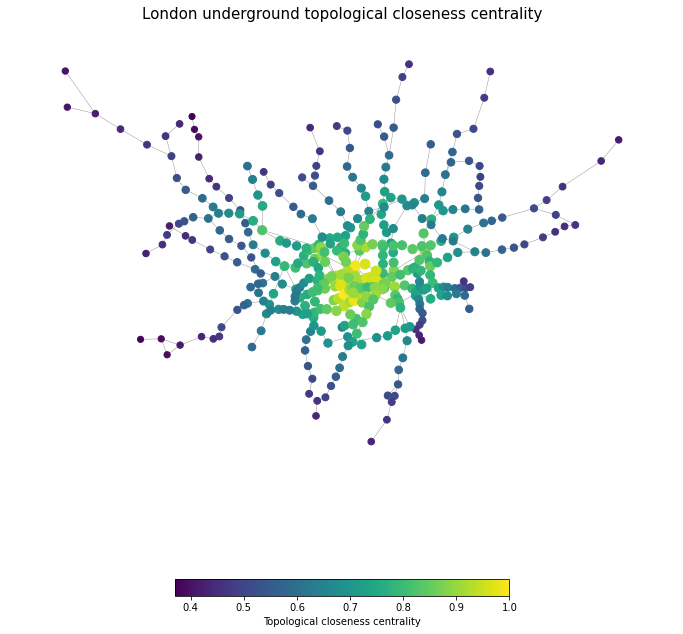

In [29]:
# Lets set color and width of nodes according to the closeness values
close_t_values=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

# close_t_color=[(i[1]['closeness_t']-min(close_t_values))/(max(close_t_values)-min(close_t_values)) for i in G.nodes(data=True)]
# close_t_size=[((i[1]['closeness_t']-min(close_t_values))/(max(close_t_values)-min(close_t_values))*50) for i in G.nodes(data=True)]

close_t_color=[(i[1]['closeness_t']/max(close_t_values)) for i in G.nodes(data=True)]
close_t_size=[(i[1]['closeness_t']/max(close_t_values)*100) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= close_t_color,
        node_size= close_t_size)

plt.colorbar(nod,label="Topological closeness centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground topological closeness centrality",fontsize=15)
plt.show()

#### Betweenness centrality

In [30]:
df_centrality['betweenness_t'].sort_values(ascending=False)[0:10]

Stratford                   0.297846
Bank and Monument           0.290489
Liverpool Street            0.270807
King's Cross St. Pancras    0.255307
Waterloo                    0.243921
Green Park                  0.215835
Euston                      0.208324
Westminster                 0.203335
Baker Street                0.191568
Finchley Road               0.165085
Name: betweenness_t, dtype: float64

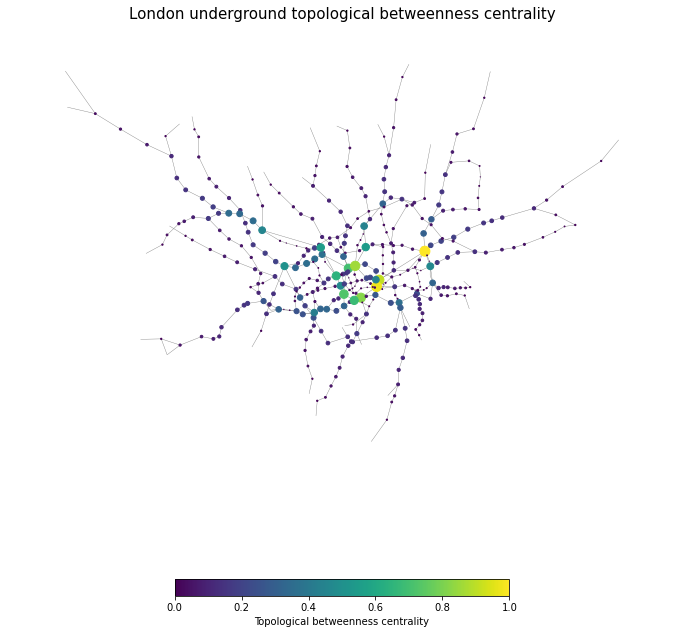

In [31]:
# Lets set colour and size of nodes according to betweenness values
bet_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(bet_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(bet_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Topological betweenness centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground topological betweenness centrality",fontsize=15)
plt.show()

#### Eigenvector  centrality

In [32]:
df_centrality['eigenvector_t'].sort_values(ascending=False)[0:10]

Stratford                   0.297846
Bank and Monument           0.290489
Liverpool Street            0.270807
King's Cross St. Pancras    0.255307
Waterloo                    0.243921
Green Park                  0.215835
Euston                      0.208324
Westminster                 0.203335
Baker Street                0.191568
Finchley Road               0.165085
Name: eigenvector_t, dtype: float64

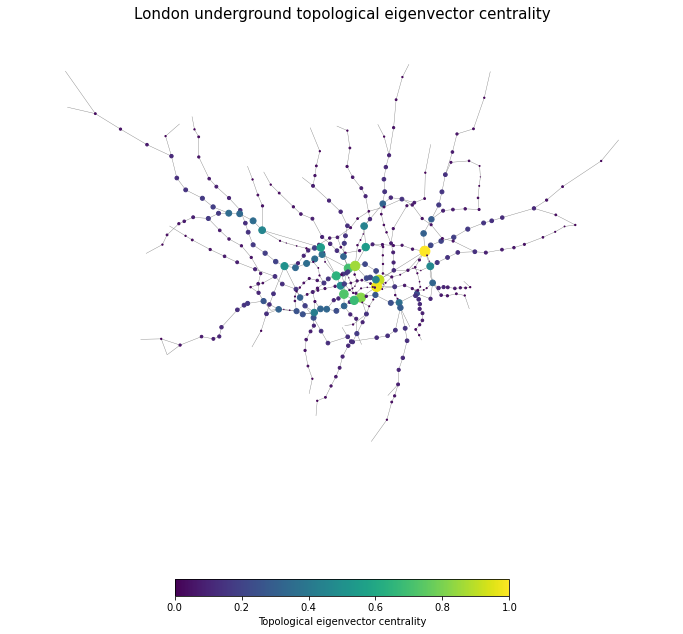

In [33]:
# Eigenvetor centrality
eig_t_values=[(i[1]['eigenvector_t']) for i in G.nodes(data=True)]
eig_t_color=[(i[1]['eigenvector_t']/max(eig_t_values)) for i in G.nodes(data=True)]
eig_t_size=[(i[1]['eigenvector_t']/max(eig_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= eig_t_color, node_size= eig_t_size)

plt.colorbar(nod,label="Topological eigenvector centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground topological eigenvector centrality",fontsize=15)
plt.show()

#### Results summary

In [34]:
df_ranking = pd.DataFrame()
rank = list(range(1, df_centrality.shape[0]+1))
df_ranking['Rank'] = rank

degree_rank = df_centrality.sort_values(by='degree',ascending=False).index.values.tolist()
degree_value = df_centrality['degree'].sort_values(ascending=False).values.tolist()
clos_rank = df_centrality.sort_values(by='closeness_t',ascending=False).index.values.tolist()
clos_value = df_centrality['closeness_t'].sort_values(ascending=False).values.tolist()
bet_rank = df_centrality.sort_values(by='betweenness_t',ascending=False).index.values.tolist()
bet_value = df_centrality['betweenness_t'].sort_values(ascending=False).values.tolist()
eig_rank = df_centrality.sort_values(by='eigenvector_t',ascending=False).index.values.tolist()
eig_value = df_centrality['eigenvector_t'].sort_values(ascending=False).values.tolist()


df_ranking['Degree'] = degree_rank
df_ranking['Degree value'] = degree_value
df_ranking['Topological closeness'] = clos_rank
df_ranking['Closeness value'] = clos_value
df_ranking['Topological betweenness'] = bet_rank
df_ranking['Betweenness value'] = bet_value
df_ranking['Topological Eigenvector'] = eig_rank
df_ranking['Eigenvector value'] = eig_value

df_ranking.head(10)


,Rank,Degree,Degree value,Topological closeness,Closeness value,Topological betweenness,Betweenness value,Topological Eigenvector,Eigenvector value
0,1,Stratford,0.0225,Green Park,0.114778,Stratford,0.297846,Stratford,0.297846
1,2,Bank and Monument,0.0200,Bank and Monument,0.113572,Bank and Monument,0.290489,Bank and Monument,0.290489
2,3,Baker Street,0.0175,King's Cross St. Pancras,0.113443,Liverpool Street,0.270807,Liverpool Street,0.270807
3,4,King's Cross St. Pancras,0.0175,Westminster,0.112549,King's Cross St. Pancras,0.255307,King's Cross St. Pancras,0.255307
4,5,Liverpool Street,0.0150,Waterloo,0.112265,Waterloo,0.243921,Waterloo,0.243921
5,6,Green Park,0.0150,Oxford Circus,0.111204,Green Park,0.215835,Green Park,0.215835
6,7,Waterloo,0.0150,Bond Street,0.110988,Euston,0.208324,Euston,0.208324
7,8,West Ham,0.0150,Farringdon,0.110742,Westminster,0.203335,Westminster,0.203335
8,9,Oxford Circus,0.0150,Angel,0.110742,Baker Street,0.191568,Baker Street,0.191568
9,10,Canning Town,0.0150,Moorgate,0.110314,Finchley Road,0.165085,Finchley Road,0.165085


In [35]:
df_ranking.head(10).drop(['Topological closeness','Closeness value'], axis=1)

,Rank,Degree,Degree value,Topological betweenness,Betweenness value,Topological Eigenvector,Eigenvector value
0,1,Stratford,0.0225,Stratford,0.297846,Stratford,0.297846
1,2,Bank and Monument,0.0200,Bank and Monument,0.290489,Bank and Monument,0.290489
2,3,Baker Street,0.0175,Liverpool Street,0.270807,Liverpool Street,0.270807
3,4,King's Cross St. Pancras,0.0175,King's Cross St. Pancras,0.255307,King's Cross St. Pancras,0.255307
4,5,Liverpool Street,0.0150,Waterloo,0.243921,Waterloo,0.243921
5,6,Green Park,0.0150,Green Park,0.215835,Green Park,0.215835
6,7,Waterloo,0.0150,Euston,0.208324,Euston,0.208324
7,8,West Ham,0.0150,Westminster,0.203335,Westminster,0.203335
8,9,Oxford Circus,0.0150,Baker Street,0.191568,Baker Street,0.191568
9,10,Canning Town,0.0150,Finchley Road,0.165085,Finchley Road,0.165085


In [36]:
# ax = plt.subplot(111, frame_on=False) # no visible frame
# ax.xaxis.set_visible(False)  # hide the x axis
# ax.yaxis.set_visible(False)  # hide the y axis

# table(ax, df_ranking.head(10))  # where df is your data frame

# plt.savefig('Results_Centrality_Measures.png')

In [37]:
# df_ranking.loc[]

### Impact measures

**Nodes**

In [38]:
#list(G.nodes())

**Number of nodes**

In [39]:
G.number_of_nodes()

401

**Diameter**

In [40]:
d=nx.diameter(G)
print(d)

36


**Average shortest path**

In [41]:
asp = nx.average_shortest_path_length(G)
print(asp)

13.545997506234414


**Number of connected components**

In [42]:
nx.number_connected_components(G)

1

**Size of the largest component**

In [43]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G.subgraph(largest_component)

In [44]:
Largest_subgraph.number_of_nodes()

401

In [45]:
type(components)

generator

In [46]:
# You can compute the diameter of the largest component
d_lc = nx.diameter(Largest_subgraph)
d_lc

36

**Size of multiple components**

In [47]:
# To comput the size ( number of node) of each component
Subg = [G.subgraph(c).copy() for c in nx.connected_components(G)]
[len(subgraph.nodes) for subgraph in Subg]

[401]

In [48]:
list([len(subgraph.nodes) for subgraph in Subg])

[401]

In [49]:
type([len(subgraph.nodes) for subgraph in Subg])

list

### Node removal

#### Non-sequential

In [50]:
# Copy of the initial network
G_copy = G.copy()

In [51]:
# Create a blank df
non_sq_df = pd.DataFrame()
#Create empy columns
non_sq_df['Nodes'] = np.nan
non_sq_df['Removed nodes'] = np.nan
non_sq_df['Diameter'] = np.nan
non_sq_df['Average shortest path'] = np.nan
non_sq_df['Number of connected components'] = np.nan
non_sq_df['Size of largest connected component'] = np.nan

In [52]:
# List of ranking lists
ranks = [degree_rank, clos_rank, bet_rank, eig_rank]

In [53]:
labels = ['Degree', 'Closeness', 'Betweenness', 'Eigenvector']

In [54]:
# For loop to calculate impact measures in non-sequential node removal
counter = 0
for r in ranks:
    #print(r)
    G_i = G_copy.copy()

    for station in r[0:21]: 
        # Remove a node from the graph
        
        #print(station) 
        #G_i.remove_node(station) # Erasing before the first impact measurement is performed

        # Check if the graph is connected
        if nx.is_connected(G_i):
            # Calculate the number of nodes in the graph
            nodes = nx.number_of_nodes(G_i)
            # Number of removed nodes
            re_nodes = G_copy.number_of_nodes() - G_i.number_of_nodes()
            # Diameter
            diameter = nx.diameter(G_i)
            #Average shortest path of the connected component
            avr_shortest = nx.average_shortest_path_length(G_i)
            # Number of connected componets
            num_con = nx.number_connected_components(G_i)
            # Size of the largest component
            components = nx.connected_components(G_i)
            # Use the max() command to find the largest one:
            largest_component = max(components, key=len)
            # Create a "subgraph" of the largest component
            Largest_subgraph = G_i.subgraph(largest_component)
            size_lar_com = Largest_subgraph.number_of_nodes()

            # Add the station, number of nodes, and diameter to the DataFrame
            # non_sq = non_sq.append({'Nodes': nodes, 'Removed nodes': re_nodes, 'Diameter for largest component': diameter,'Average shortest path':avr_shortest}, ignore_index=True)
            non_sq_df = pd.concat([non_sq_df, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter': [diameter],'Average shortest path':[avr_shortest], 'Centrality measure':labels[counter], 'Number of connected components': num_con, 'Size of largest connected component':size_lar_com})], ignore_index=True)
            G_i.remove_node(station)
        else:
            # Find the largest connected component
            lar_component = max(nx.connected_components(G_i), key=len)
            # Create a subgraph of the largest connected component
            Largest_subgraph = G_i.subgraph(lar_component)
            # Calculate the number of nodes in the subgraph
            nodes = nx.number_of_nodes(G_i)
            # Number of removed nodes
            re_nodes = G_copy.number_of_nodes() - G_i.number_of_nodes()
            # Calculate the diameter of the largest connedted component
            diameter = nx.diameter(Largest_subgraph)
            # Average shortest path of the largest connedted component
            avr_shortest = nx.average_shortest_path_length(Largest_subgraph)
            # Number of connected componets
            num_con = nx.number_connected_components(G_i)
            # Size of the largest component
            size_lar_com = Largest_subgraph.number_of_nodes()
           

            # Add the station, number of nodes, and diameter to the DataFrame
            non_sq_df = pd.concat([non_sq_df, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter': [diameter],'Average shortest path':[avr_shortest], 'Centrality measure':labels[counter], 'Number of connected components': num_con, 'Size of largest connected component':size_lar_com})], ignore_index=True)
            G_i.remove_node(station)
        
    counter += 1
        
    #print(counter)
        

In [55]:
non_sq_df.head()

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Centrality measure
0,401.0,0.0,36.0,13.545998,1.0,401.0,Degree
1,400.0,1.0,49.0,14.496447,3.0,379.0,Degree
2,399.0,2.0,49.0,14.872497,3.0,378.0,Degree
3,398.0,3.0,49.0,15.686438,3.0,377.0,Degree
4,397.0,4.0,49.0,17.013376,4.0,374.0,Degree


In [56]:
# #Working code
# fig, [ax1,ax2,ax3,ax4] = plt.subplots(1, 4, sharey=False, tight_layout=True,figsize=(20, 7))
# plt.suptitle('Impact measure - Non-sequential node removal',fontsize=22)
# ax1.set_ylabel("Impact measurement value",fontsize=14)
# sns.lineplot(data=non_sq_df, x="Removed nodes", y="Diameter",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure',linewidth = 2.5)
# sns.lineplot(data=non_sq_df, x="Removed nodes", y="Average shortest path",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)
# sns.lineplot(data=non_sq_df, x="Removed nodes", y="Number of connected components",palette="tab10",hue='Centrality measure',ax=ax3,style='Centrality measure',linewidth = 2.5)
# sns.lineplot(data=non_sq_df, x="Removed nodes", y="Size of largest connected component",palette="tab10",hue='Centrality measure',ax=ax4,style='Centrality measure',linewidth = 2.5)


# ax1.set_title("Diameter",fontsize=16)
# ax2.set_title("Average shortest path",fontsize=16)
# ax3.set_title("Number of connected components",fontsize=16)
# ax4.set_title("Size of largest connected component",fontsize=16)

# ax2.set_ylabel('')
# ax3.set_ylabel('')
# ax4.set_ylabel('')

# # ax1.set_yticklabels([])
# # ax2.set_yticklabels([]) # remove lable axis
# # ax2.set_yticks([])


# ax1.get_legend().remove()
# ax2.get_legend().remove()
# ax3.get_legend().remove()
# plt.legend(bbox_to_anchor=(1.7, 0.5),loc='center right',title='Centrality\nmeasure',fontsize=14,title_fontsize=16)

# ax1.set_xlabel("Removed nodes",fontsize=14)
# ax2.set_xlabel("Removed nodes",fontsize=14)
# ax3.set_xlabel("Removed nodes",fontsize=14)
# ax4.set_xlabel("Removed nodes",fontsize=14)

# for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
# 	label.set_fontsize(14)

# for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
# 	label.set_fontsize(14)
    
# for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
# 	label.set_fontsize(14)
    
# for label in (ax4.get_xticklabels() + ax4.get_yticklabels()):
# 	label.set_fontsize(14)
    
# # plt.savefig("Dis_line_ratio_meta_M1_M2_M3.jpg",dpi=300)

In [57]:
# Selecting data for plotting
non_sq_df[(non_sq_df['Centrality measure']=='Degree') | (non_sq_df['Centrality measure']=='Betweenness') | (non_sq_df['Centrality measure']=='Eigenvector')].tail()

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Centrality measure
79,385.0,16.0,70.0,22.306943,13.0,285.0,Eigenvector
80,384.0,17.0,70.0,22.306943,14.0,285.0,Eigenvector
81,383.0,18.0,72.0,23.631837,14.0,284.0,Eigenvector
82,382.0,19.0,72.0,23.613688,14.0,283.0,Eigenvector
83,381.0,20.0,43.0,16.671866,15.0,149.0,Eigenvector


In [58]:
# Selecting data for plotting
non_sq_df[(non_sq_df['Centrality measure']=='Degree') | (non_sq_df['Centrality measure']=='Betweenness') | (non_sq_df['Centrality measure']=='Eigenvector')].head()

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Centrality measure
0,401.0,0.0,36.0,13.545998,1.0,401.0,Degree
1,400.0,1.0,49.0,14.496447,3.0,379.0,Degree
2,399.0,2.0,49.0,14.872497,3.0,378.0,Degree
3,398.0,3.0,49.0,15.686438,3.0,377.0,Degree
4,397.0,4.0,49.0,17.013376,4.0,374.0,Degree


In [59]:
# Subsetting the df for plotting
non_sq_df_plot = non_sq_df[(non_sq_df['Centrality measure']=='Degree') | (non_sq_df['Centrality measure']=='Betweenness') | (non_sq_df['Centrality measure']=='Eigenvector')]

In [60]:
# Setting the theme
sns.set_theme()

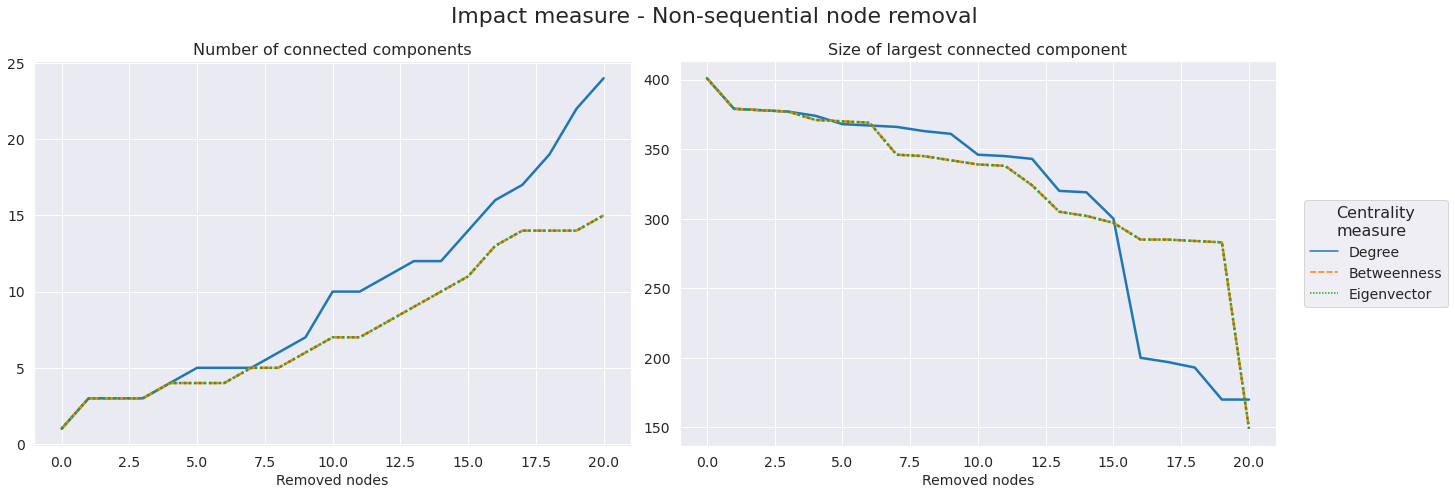

In [61]:
#Plotting just 3 centrality measures
fig, [ax1,ax2] = plt.subplots(1, 2, sharey=False, tight_layout=True,figsize=(20, 7))
plt.suptitle('Impact measure - Non-sequential node removal',fontsize=22)
ax1.set_ylabel("Impact measurement value",fontsize=14)
# sns.lineplot(data=non_sq_df, x="Removed nodes", y="Diameter",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure',linewidth = 2.5)
# sns.lineplot(data=non_sq_df, x="Removed nodes", y="Average shortest path",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=non_sq_df_plot, x="Removed nodes", y="Number of connected components",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=non_sq_df_plot, x="Removed nodes", y="Size of largest connected component",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)


# ax1.set_title("Diameter",fontsize=16)
# ax2.set_title("Average shortest path",fontsize=16)
ax1.set_title("Number of connected components",fontsize=16)
ax2.set_title("Size of largest connected component",fontsize=16)

ax1.set_ylabel('')
ax2.set_ylabel('')
# ax4.set_ylabel('')

# ax1.set_yticklabels([])
# ax2.set_yticklabels([]) # remove lable axis
# ax2.set_yticks([])


ax1.get_legend().remove()
# ax2.get_legend().remove()
# ax3.get_legend().remove()
plt.legend(bbox_to_anchor=(1.3, 0.5),loc='center right',title='Centrality\nmeasure',fontsize=14,title_fontsize=16)

ax1.set_xlabel("Removed nodes",fontsize=14)
ax2.set_xlabel("Removed nodes",fontsize=14)
# ax3.set_xlabel("Removed nodes",fontsize=14)
# ax4.set_xlabel("Removed nodes",fontsize=14)

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
	label.set_fontsize(14)

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
	label.set_fontsize(14)
    
# for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
# 	label.set_fontsize(14)
    
# for label in (ax4.get_xticklabels() + ax4.get_yticklabels()):
# 	label.set_fontsize(14)
    
# plt.savefig("Dis_line_ratio_meta_M1_M2_M3.jpg",dpi=300)

#### Sequential

In [62]:
measures = ['degree','closeness','betweenness','eigenvector']

In [63]:
# Define a dictionary of functions
functions_dict = {'degree': nx.degree_centrality,
                  'closeness': nx.closeness_centrality,
                  'betweenness': nx.betweenness_centrality,
                 'eigenvector':nx.eigenvector_centrality_numpy}

In [64]:
# Create a blank df
sq_df = pd.DataFrame()
#Create empy columns
sq_df['Nodes'] = np.nan
sq_df['Removed nodes'] = np.nan
sq_df['Diameter'] = np.nan
sq_df['Average shortest path'] = np.nan
sq_df['Number of connected components'] = np.nan
sq_df['Size of largest connected component'] = np.nan
sq_df['Node removed'] = np.nan

In [65]:
# Working code
counter = 0
for m in measures:
    #print(r)
    G_i = G_copy.copy()
    # print(m)

    for i in range(21): 
        # Remove a node from the graph
        
        # Calculate the centrality measure
        centrality_list = functions_dict[m](G_i)
        max_centrality_node = max(centrality_list, key=centrality_list.get)
        # print(max_centrality_node)
        
        # Check if the graph is connected
        if nx.is_connected(G_i):
            # Calculate the number of nodes in the graph
            nodes = nx.number_of_nodes(G_i)
            # Number of removed nodes
            re_nodes = G_copy.number_of_nodes() - G_i.number_of_nodes()
            # Diameter
            diameter = nx.diameter(G_i)
            #Average shortest path of the connected component
            avr_shortest = nx.average_shortest_path_length(G_i)
            # Number of connected componets
            num_con = nx.number_connected_components(G_i)
            # Size of the largest component
            components = nx.connected_components(G_i)
            # Use the max() command to find the largest one:
            largest_component = max(components, key=len)
            # Create a "subgraph" of the largest component
            Largest_subgraph = G_i.subgraph(largest_component)
            size_lar_com = Largest_subgraph.number_of_nodes()
            

        

            # Add the station, number of nodes, and diameter to the DataFrame
            # non_sq = non_sq.append({'Nodes': nodes, 'Removed nodes': re_nodes, 'Diameter for largest component': diameter,'Average shortest path':avr_shortest}, ignore_index=True)
            sq_df = pd.concat([sq_df, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter': [diameter],'Average shortest path':[avr_shortest], 'Centrality measure':labels[counter], 'Number of connected components': num_con, 'Size of largest connected component':size_lar_com,'Node removed':max_centrality_node})], ignore_index=True)
            G_i.remove_node(max_centrality_node)
        else:
            # Find the largest connected component
            lar_component = max(nx.connected_components(G_i), key=len)
            # Create a subgraph of the largest connected component
            Largest_subgraph = G_i.subgraph(lar_component)
            # Calculate the number of nodes in the subgraph
            nodes = nx.number_of_nodes(G_i)
            # Number of removed nodes
            re_nodes = G_copy.number_of_nodes() - G_i.number_of_nodes()
            # Calculate the diameter of the largest connedted component
            diameter = nx.diameter(Largest_subgraph)
            # Average shortest path of the largest connedted component
            avr_shortest = nx.average_shortest_path_length(Largest_subgraph)
            # Number of connected componets
            num_con = nx.number_connected_components(G_i)
            # Size of the largest component
            size_lar_com = Largest_subgraph.number_of_nodes()
           

            # Add the station, number of nodes, and diameter to the DataFrame
            sq_df = pd.concat([sq_df, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter': [diameter],'Average shortest path':[avr_shortest], 'Centrality measure':labels[counter], 'Number of connected components': num_con, 'Size of largest connected component':size_lar_com,'Node removed':max_centrality_node})], ignore_index=True)
            G_i.remove_node(max_centrality_node)
        
    counter += 1
        
    #print(counter)
        

In [66]:
sq_df.head()

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Node removed,Centrality measure
0,401.0,0.0,36.0,13.545998,1.0,401.0,Stratford,Degree
1,400.0,1.0,49.0,14.496447,3.0,379.0,Bank and Monument,Degree
2,399.0,2.0,49.0,14.872497,3.0,378.0,King's Cross St. Pancras,Degree
3,398.0,3.0,49.0,16.054927,3.0,377.0,Baker Street,Degree
4,397.0,4.0,49.0,17.013376,4.0,374.0,Oxford Circus,Degree


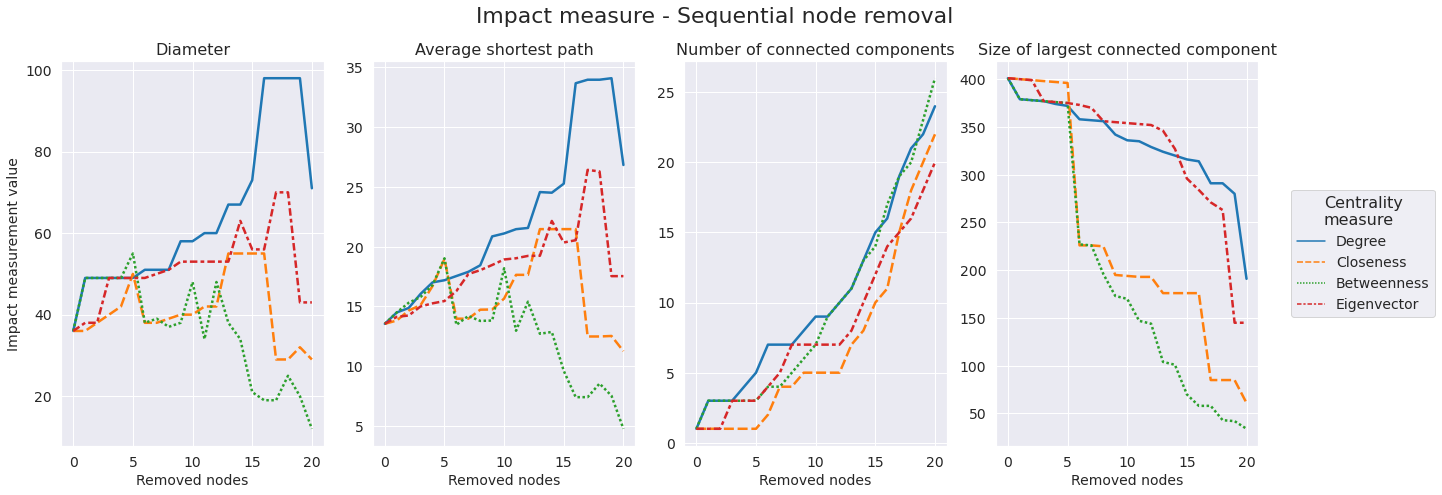

In [67]:
# Working code
# Plot for sequential
fig, [ax1,ax2,ax3,ax4] = plt.subplots(1, 4, sharey=False, tight_layout=True,figsize=(20, 7))
plt.suptitle('Impact measure - Sequential node removal',fontsize=22)
ax1.set_ylabel("Impact measurement value",fontsize=14)
sns.lineplot(data=sq_df, x="Removed nodes", y="Diameter",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure', linewidth = 2.5)
sns.lineplot(data=sq_df, x="Removed nodes", y="Average shortest path",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=sq_df, x="Removed nodes", y="Number of connected components",palette="tab10",hue='Centrality measure',ax=ax3,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=sq_df, x="Removed nodes", y="Size of largest connected component",palette="tab10",hue='Centrality measure',ax=ax4,style='Centrality measure',linewidth = 2.5)


ax1.set_title("Diameter",fontsize=16)
ax2.set_title("Average shortest path",fontsize=16)
ax3.set_title("Number of connected components",fontsize=16)
ax4.set_title("Size of largest connected component",fontsize=16)

ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')

# ax1.set_yticklabels([])
# ax2.set_yticklabels([]) # remove lable axis
# ax2.set_yticks([])


ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
plt.legend(bbox_to_anchor=(1.7, 0.5),loc='center right',title='Centrality\nmeasure',fontsize=14,title_fontsize=16)

ax1.set_xlabel("Removed nodes",fontsize=14)
ax2.set_xlabel("Removed nodes",fontsize=14)
ax3.set_xlabel("Removed nodes",fontsize=14)
ax4.set_xlabel("Removed nodes",fontsize=14)

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
	label.set_fontsize(14)

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
	label.set_fontsize(14)
    
for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
	label.set_fontsize(14)
    
for label in (ax4.get_xticklabels() + ax4.get_yticklabels()):
	label.set_fontsize(14)
    
# plt.savefig("Dis_line_ratio_meta_M1_M2_M3.jpg",dpi=300)

In [68]:
# Selecting data for plotting
sq_df[(sq_df['Centrality measure']=='Degree') | (sq_df['Centrality measure']=='Betweenness') | (sq_df['Centrality measure']=='Eigenvector')].tail()

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Node removed,Centrality measure
79,385.0,16.0,56.0,20.542975,14.0,284.0,Canada Water,Eigenvector
80,384.0,17.0,70.0,26.424409,15.0,271.0,Green Park,Eigenvector
81,383.0,18.0,70.0,26.288393,16.0,263.0,Wembley Park,Eigenvector
82,382.0,19.0,43.0,17.536207,18.0,145.0,Whitechapel,Eigenvector
83,381.0,20.0,43.0,17.536207,20.0,145.0,Notting Hill Gate,Eigenvector


In [69]:
# Selecting data for plotting
sq_df[(sq_df['Centrality measure']=='Degree') | (sq_df['Centrality measure']=='Betweenness') | (sq_df['Centrality measure']=='Eigenvector')].head()

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Node removed,Centrality measure
0,401.0,0.0,36.0,13.545998,1.0,401.0,Stratford,Degree
1,400.0,1.0,49.0,14.496447,3.0,379.0,Bank and Monument,Degree
2,399.0,2.0,49.0,14.872497,3.0,378.0,King's Cross St. Pancras,Degree
3,398.0,3.0,49.0,16.054927,3.0,377.0,Baker Street,Degree
4,397.0,4.0,49.0,17.013376,4.0,374.0,Oxford Circus,Degree


In [70]:
# Subsetting the df for plotting
sq_df_plot = sq_df[(sq_df['Centrality measure']=='Degree') | (sq_df['Centrality measure']=='Betweenness') | (sq_df['Centrality measure']=='Eigenvector')]

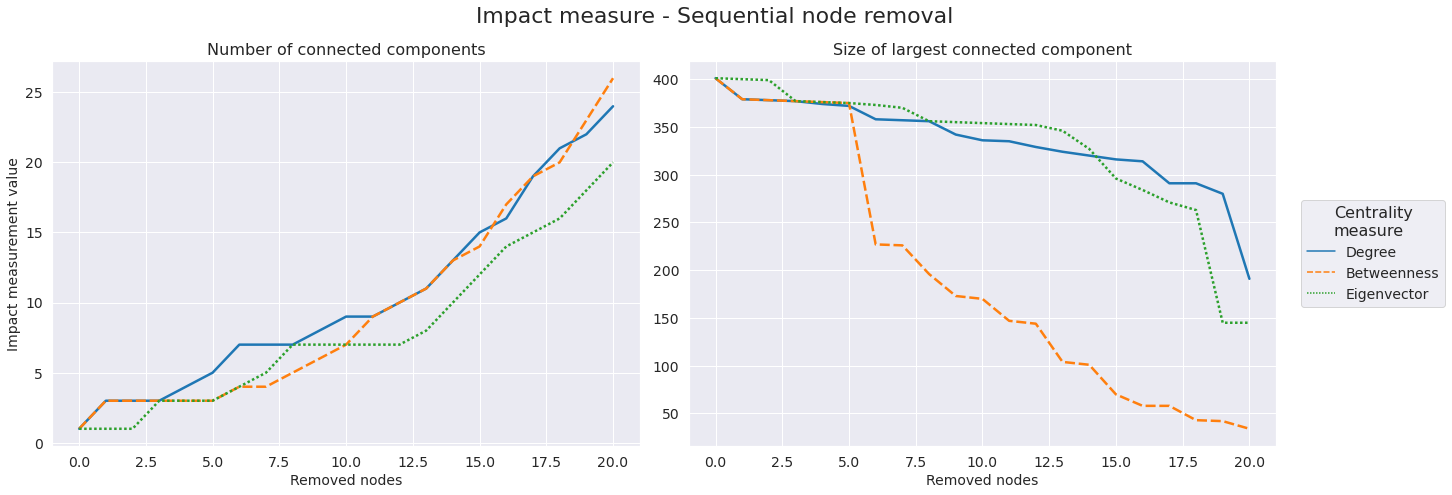

In [71]:
# Testing code
# Plot for sequential for degre, betweenness and eigenvector
fig, [ax1,ax2] = plt.subplots(1, 2, sharey=False, tight_layout=True,figsize=(20, 7))
plt.suptitle('Impact measure - Sequential node removal',fontsize=22)
ax1.set_ylabel("Impact measurement value",fontsize=14)
# sns.lineplot(data=sq_df, x="Removed nodes", y="Diameter",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure', linewidth = 2.5)
# sns.lineplot(data=sq_df, x="Removed nodes", y="Average shortest path",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=sq_df_plot, x="Removed nodes", y="Number of connected components",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=sq_df_plot, x="Removed nodes", y="Size of largest connected component",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)


# ax1.set_title("Diameter",fontsize=16)
# ax2.set_title("Average shortest path",fontsize=16)
ax1.set_title("Number of connected components",fontsize=16)
ax2.set_title("Size of largest connected component",fontsize=16)

ax2.set_ylabel('')
# ax3.set_ylabel('')
# ax4.set_ylabel('')

# ax1.set_yticklabels([])
# ax2.set_yticklabels([]) # remove lable axis
# ax2.set_yticks([])


ax1.get_legend().remove()
# ax2.get_legend().remove()
# ax3.get_legend().remove()
plt.legend(bbox_to_anchor=(1.3, 0.5),loc='center right',title='Centrality\nmeasure',fontsize=14,title_fontsize=16)

ax1.set_xlabel("Removed nodes",fontsize=14)
ax2.set_xlabel("Removed nodes",fontsize=14)
# ax3.set_xlabel("Removed nodes",fontsize=14)
# ax4.set_xlabel("Removed nodes",fontsize=14)

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
	label.set_fontsize(14)

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
	label.set_fontsize(14)
    
# for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
# 	label.set_fontsize(14)
    
# for label in (ax4.get_xticklabels() + ax4.get_yticklabels()):
# 	label.set_fontsize(14)
    
# plt.savefig("Dis_line_ratio_meta_M1_M2_M3.jpg",dpi=300)

**Total results**

In [72]:
plot_labels = ['Degree','Betweenness', 'Eigenvector']

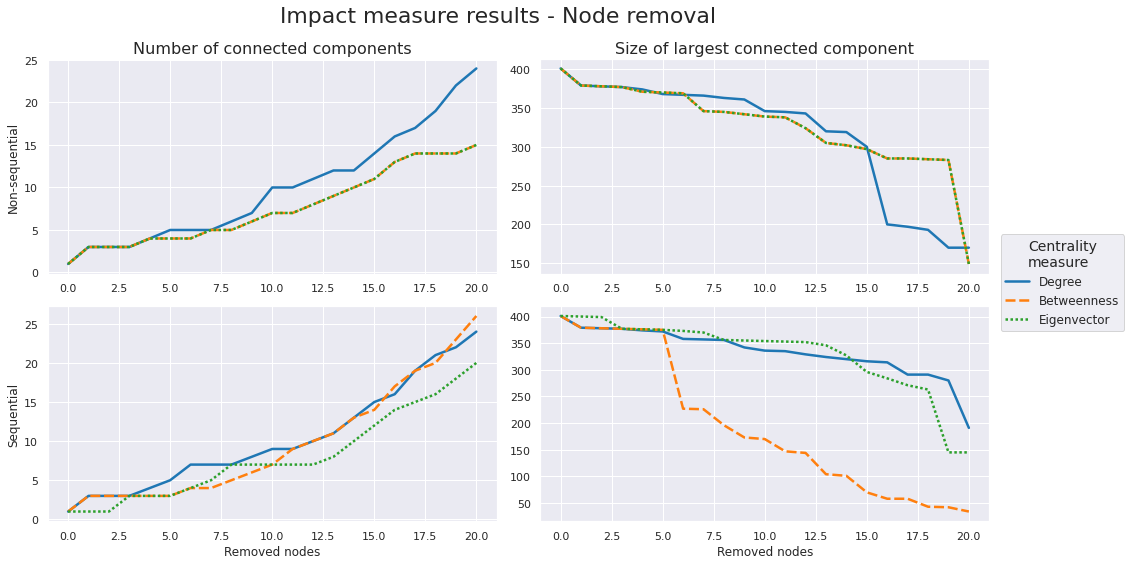

In [73]:
# Plot total results
fig, axes = plt.subplots(2, 2, sharey=False, tight_layout=True,figsize=(14, 8))
plt.suptitle('Impact measure results - Node removal',fontsize=22)
# axes[0,0].set_ylabel("Non-sequential",fontsize=14)
# axes[0,1].set_ylabel("Sequential",fontsize=14)

axes[0,0].set_title("Number of connected components",fontsize=16)
axes[0,1].set_title("Size of largest connected component",fontsize=16)


sns.lineplot(data=non_sq_df_plot, x="Removed nodes", y="Number of connected components",palette="tab10",hue='Centrality measure',ax=axes[0,0],style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=non_sq_df_plot, x="Removed nodes", y="Size of largest connected component",palette="tab10",hue='Centrality measure',ax=axes[0,1],style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=sq_df_plot, x="Removed nodes", y="Number of connected components",palette="tab10",hue='Centrality measure',ax=axes[1,0],style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=sq_df_plot, x="Removed nodes", y="Size of largest connected component",palette="tab10",hue='Centrality measure',ax=axes[1,1],style='Centrality measure',linewidth = 2.5)

axes[0,0].set_ylabel('Non-sequential')
axes[0,1].set_ylabel('')
axes[1,0].set_ylabel('Sequential')
axes[1,1].set_ylabel('')

# axes[0,0].get_xaxis().set_visible(False)
# axes[0,1].get_xaxis().set_visible(False)

axes[0,0].get_legend().remove()
axes[0,1].get_legend().remove()
axes[1,0].get_legend().remove()
axes[1,1].get_legend().remove()
axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')

# Change the location of legend
# plt.legend(bbox_to_anchor=(1.45,1),loc='center right',title='Centrality\nmeasure',fontsize=14,title_fontsize=16)
fig.legend(bbox_to_anchor=(1.127,0.5),labels=plot_labels,loc='center right',title='Centrality\nmeasure',fontsize=12,title_fontsize=14)
# fig.legend(bbox_to_anchor=(0.5,-0.09),labels=plot_labels,loc="lower center",ncol=3,title='Centrality measure',fontsize=12,title_fontsize=14)
plt.savefig('Results_Impact_Measures_Total.jpg',dpi=300,bbox_inches='tight')

## Flows: weighted network

### Centrality measures

In [74]:
# Copy of the original network
G_w = G_copy.copy()

In [75]:
print(nx.info(G_w))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_4330/1022404788.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G_w))


In [76]:
list(G_w.edges(data = True))[0]

('Liverpool Street',
 'Stratford',
 {'length': 6698.461270481078, 'line_name': 'TfL Rail', 'flows': 163165})

In [77]:
# Inspecting for zero valuea on the flows
zero_flows = [(u, v) for u, v, d in G_w.edges(data=True) if d['flows'] == 0]
print(zero_flows)

[('Wandsworth Road', 'Battersea Park'), ('Kennington', 'Nine Elms'), ('Battersea Power Station', 'Nine Elms')]


In [78]:
# Assignning non-zero value in flows
nx.set_edge_attributes(G_w, {('Wandsworth Road', 'Battersea Park'): {'flows': 1}, ('Kennington', 'Nine Elms'): {'flows': 1}, ('Battersea Power Station', 'Nine Elms'): {'flows': 1}})

In [79]:
# Inspecting after assignin non-zero values
zero_flows = [(u, v) for u, v, d in G_w.edges(data=True) if d['flows'] == 0]
print(zero_flows)

[]


In [80]:
# Inspecting after assignin non-zero values
zero_flows = [(u, v) for u, v, d in G_w.edges(data=True) if d['flows'] == 1]
print(zero_flows)

[('Wandsworth Road', 'Battersea Park'), ('Kennington', 'Nine Elms'), ('Battersea Power Station', 'Nine Elms')]


In [81]:
# Edge with the highest and lowest flow
# Highest
max_flow = max(G_w.edges(data=True), key=lambda x: x[2]['flows'])
print(max_flow)

('Bank and Monument', 'Waterloo', {'length': 2542.954443856927, 'line_name': 'Waterloo & City', 'flows': 233937})


In [82]:
# Lowest
min_flow = min(G_w.edges(data=True), key=lambda x: x[2]['flows'])
print(min_flow)

('Wandsworth Road', 'Battersea Park', {'length': 1168.4892614621972, 'line_name': 'London Overground', 'flows': 1})


In [83]:
# Invert the flows as it is supposed to be a distance
inv_flows={(e1, e2):round(1./flows,7) for e1, e2, flows in G_w.edges(data='flows')}

# Let us add the inverted weight as an attribute to the edges in the graph
nx.set_edge_attributes(G_w, inv_flows, 'inv_flows')

In [84]:
# Print head of edge list with attributes
list(G_w.edges(data = True))[0:5]

[('Liverpool Street',
  'Stratford',
  {'length': 6698.461270481078,
   'line_name': 'TfL Rail',
   'flows': 163165,
   'inv_flows': 6.1e-06}),
 ('Liverpool Street',
  'Bank and Monument',
  {'length': 841.5026837499356,
   'line_name': 'Central',
   'flows': 166338,
   'inv_flows': 6e-06}),
 ('Liverpool Street',
  'Bethnal Green',
  {'length': 2408.292001906184,
   'line_name': 'London Overground',
   'flows': 31970,
   'inv_flows': 3.13e-05}),
 ('Liverpool Street',
  'Aldgate East',
  {'length': 965.8659667184489,
   'line_name': 'Hammersmith & City',
   'flows': 18372,
   'inv_flows': 5.44e-05}),
 ('Liverpool Street',
  'Moorgate',
  {'length': 434.0874486023312,
   'line_name': 'Circle',
   'flows': 45522,
   'inv_flows': 2.2e-05})]

#### Calculation

In [85]:
df_centrality_w = pd.DataFrame(index=G_w.nodes())

deg_london =nx.degree_centrality(G_w)
nx.set_node_attributes(G_w,dict(deg_london),'degree')
df_centrality_w['degree'] = pd.Series(nx.get_node_attributes(G_w, 'degree'))

deg_london_w =G_w.degree(weight='flows')
nx.set_node_attributes(G_w,dict(deg_london_w),'degree_w')
df_centrality_w['degree_w'] = pd.Series(nx.get_node_attributes(G_w, 'degree_w'))

clos_london_w = nx.closeness_centrality(G_w,distance='inv_flows')
nx.set_node_attributes(G_w,clos_london_w,'closeness_w')
df_centrality_w['closeness_w'] = pd.Series(nx.get_node_attributes(G_w, 'closeness_w'))

bet_london_w = nx.betweenness_centrality(G_w,weight='inv_flows')
nx.set_node_attributes(G_w, bet_london_w, 'betweenness_w')
df_centrality_w['betweenness_w'] = pd.Series(nx.get_node_attributes(G_w, 'betweenness_w'))

eig_london_w = nx.eigenvector_centrality_numpy(G_w,weight='flows')
nx.set_node_attributes(G_w,eig_london_w,'eigenvector_w')
df_centrality_w['eigenvector_w'] = pd.Series(nx.get_node_attributes(G_w, 'eigenvector_w'))


In [86]:
df_centrality_w

,degree,degree_w,closeness_w,betweenness_w,eigenvector_w
Liverpool Street,0.0150,436027,95.922949,0.343496,2.828294e-01
Stratford,0.0225,369869,95.888022,0.326015,1.296296e-01
Maryland,0.0050,68380,95.640022,0.062945,1.154900e-02
Forest Gate,0.0050,65817,95.387718,0.058246,1.012949e-03
Manor Park,0.0050,62421,95.119201,0.053521,8.340693e-05
...,...,...,...,...,...
Kentish Town,0.0050,78744,95.554367,0.048872,4.180877e-04
Mornington Crescent,0.0050,3618,92.403136,0.000000,1.458307e-04
Goodge Street,0.0050,6823,93.652913,0.000000,4.235084e-04
Battersea Power Station,0.0025,1,0.499890,0.000000,4.437984e-13


#### Results summary

In [87]:
df_ranking_w = pd.DataFrame()
rank = list(range(1, df_centrality.shape[0]+1))
df_ranking_w['Rank'] = rank

degree_rank = df_centrality_w.sort_values(by='degree',ascending=False).index.values.tolist()
degree_value = df_centrality_w['degree'].sort_values(ascending=False).values.tolist()
degree_rank_w = df_centrality_w.sort_values(by='degree_w',ascending=False).index.values.tolist()
degree_value_w = df_centrality_w['degree_w'].sort_values(ascending=False).values.tolist()
clos_rank_w = df_centrality_w.sort_values(by='closeness_w',ascending=False).index.values.tolist()
clos_value_w = df_centrality_w['closeness_w'].sort_values(ascending=False).values.tolist()
bet_rank_w = df_centrality_w.sort_values(by='betweenness_w',ascending=False).index.values.tolist()
bet_value_w = df_centrality_w['betweenness_w'].sort_values(ascending=False).values.tolist()
eig_rank_w = df_centrality_w.sort_values(by='eigenvector_w',ascending=False).index.values.tolist()
eig_value_w = df_centrality_w['eigenvector_w'].sort_values(ascending=False).values.tolist()


df_ranking_w['Degree'] = degree_rank
df_ranking_w['Degree value'] = degree_value
df_ranking_w['Weighted Degree'] = degree_rank_w
df_ranking_w['Weighted degree value'] = degree_value_w
df_ranking_w['Weighted closeness'] = clos_rank_w
df_ranking_w['Weighted closeness value'] = clos_value_w
df_ranking_w['Weighted betweenness'] = bet_rank_w
df_ranking_w['Weighted betweenness value'] = bet_value_w
df_ranking_w['Weighted eigenvector'] = eig_rank_w
df_ranking_w['Weighted eigenvector value'] = eig_value_w

df_ranking_w.head(10)


,Rank,Degree,Degree value,Weighted Degree,Weighted degree value,Weighted closeness,Weighted closeness value,Weighted betweenness,Weighted betweenness value,Weighted eigenvector,Weighted eigenvector value
0,1,Stratford,0.0225,Bank and Monument,639731,Green Park,95.985104,Green Park,0.566143,Waterloo,0.529565
1,2,Bank and Monument,0.0200,Green Park,623732,Westminster,95.973669,Bank and Monument,0.512857,Bank and Monument,0.492596
2,3,Baker Street,0.0175,Waterloo,558332,Waterloo,95.964406,Waterloo,0.385526,Westminster,0.422510
3,4,King's Cross St. Pancras,0.0175,King's Cross St. Pancras,464531,Bank and Monument,95.954289,Westminster,0.360301,Green Park,0.314276
4,5,Liverpool Street,0.0150,Westminster,441533,Oxford Circus,95.951421,Liverpool Street,0.343496,Liverpool Street,0.282829
5,6,Green Park,0.0150,Liverpool Street,436027,Victoria,95.936881,Stratford,0.326015,Moorgate,0.132191
6,7,Waterloo,0.0150,Euston,380910,Bond Street,95.933941,Euston,0.285204,Stratford,0.129630
7,8,West Ham,0.0150,Stratford,369869,Liverpool Street,95.922949,Oxford Circus,0.267171,Oxford Circus,0.129360
8,9,Oxford Circus,0.0150,Oxford Circus,338758,Warren Street,95.912969,Victoria,0.256178,Bond Street,0.114834
9,10,Canning Town,0.0150,Baker Street,307579,Stratford,95.888022,Bond Street,0.255053,London Bridge,0.110298


In [88]:
df_ranking_w.head(10).drop(['Weighted Degree','Weighted degree value','Weighted closeness','Weighted closeness value'], axis=1)

,Rank,Degree,Degree value,Weighted betweenness,Weighted betweenness value,Weighted eigenvector,Weighted eigenvector value
0,1,Stratford,0.0225,Green Park,0.566143,Waterloo,0.529565
1,2,Bank and Monument,0.0200,Bank and Monument,0.512857,Bank and Monument,0.492596
2,3,Baker Street,0.0175,Waterloo,0.385526,Westminster,0.422510
3,4,King's Cross St. Pancras,0.0175,Westminster,0.360301,Green Park,0.314276
4,5,Liverpool Street,0.0150,Liverpool Street,0.343496,Liverpool Street,0.282829
5,6,Green Park,0.0150,Stratford,0.326015,Moorgate,0.132191
6,7,Waterloo,0.0150,Euston,0.285204,Stratford,0.129630
7,8,West Ham,0.0150,Oxford Circus,0.267171,Oxford Circus,0.129360
8,9,Oxford Circus,0.0150,Victoria,0.256178,Bond Street,0.114834
9,10,Canning Town,0.0150,Bond Street,0.255053,London Bridge,0.110298


### Impact measures

#### Calculation

In [89]:
# Create a blank df
w_results_df = pd.DataFrame()
#Create empy columns
w_results_df['Nodes'] = np.nan
w_results_df['Removed nodes'] = np.nan
w_results_df['Diameter'] = np.nan
w_results_df['Average shortest path'] = np.nan
w_results_df['Number of connected components'] = np.nan
w_results_df['Size of largest connected component'] = np.nan
w_results_df['Total flows in largest connected component'] = np.nan
w_results_df['Node removed'] = np.nan

In [90]:
w_results_df

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Total flows in largest connected component,Node removed


In [91]:
#ranks

In [92]:
# Testing code
# For loop to calculate impact measures
counter = 0
for r in ranks:
    #print(r)
    G_w = G_copy.copy()

    for station in r[0:4]: 
        # Remove a node from the graph
        
        #print(station) 
        #G_i.remove_node(station) # Erasing before the first impact measurement is performed

        # Check if the graph is connected
        if nx.is_connected(G_w):
            # Calculate the number of nodes in the graph
            nodes = nx.number_of_nodes(G_w)
            # Number of removed nodes
            re_nodes = G_copy.number_of_nodes() - G_w.number_of_nodes()
            # Diameter
            diameter = nx.diameter(G_w)
            #Average shortest path of the connected component
            avr_shortest = nx.average_shortest_path_length(G_w)
            # Number of connected componets
            num_con = nx.number_connected_components(G_w)
            # Size of the largest component
            components = nx.connected_components(G_w)
            # Use the max() command to find the largest one:
            largest_component = max(components, key=len)
            # Create a "subgraph" of the largest component
            Largest_subgraph = G_w.subgraph(largest_component)
            size_lar_com = Largest_subgraph.number_of_nodes()
            # Total flows of connected componnets
            total_flows=sum({flows for e1, e2, flows in Largest_subgraph.edges(data='flows')})
            # Node removed for label
            node_removed = 'None' if (r.index(station) == 0) else (r[r.index(station)-1])
           

            # Add the station, number of nodes, and diameter to the DataFrame
            # non_sq = non_sq.append({'Nodes': nodes, 'Removed nodes': re_nodes, 'Diameter for largest component': diameter,'Average shortest path':avr_shortest}, ignore_index=True)
            w_results_df = pd.concat([w_results_df, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter': [diameter],'Average shortest path':[avr_shortest], 'Centrality measure':labels[counter], 'Number of connected components': num_con, 'Size of largest connected component':size_lar_com,'Total flows in largest connected component':total_flows,'Node removed':node_removed})], ignore_index=True)
            G_w.remove_node(station)
        else:
            # Find the largest connected component
            lar_component = max(nx.connected_components(G_w), key=len)
            # Create a subgraph of the largest connected component
            Largest_subgraph = G_w.subgraph(lar_component)
            # Calculate the number of nodes in the subgraph
            nodes = nx.number_of_nodes(G_w)
            # Number of removed nodes
            re_nodes = G_copy.number_of_nodes() - G_w.number_of_nodes()
            # Calculate the diameter of the largest connedted component
            diameter = nx.diameter(Largest_subgraph)
            # Average shortest path of the largest connedted component
            avr_shortest = nx.average_shortest_path_length(Largest_subgraph)
            # Number of connected componets
            num_con = nx.number_connected_components(G_w)
            # Size of the largest component
            size_lar_com = Largest_subgraph.number_of_nodes()
            # Total flows of connected componnets
            total_flows=sum({flows for e1, e2, flows in Largest_subgraph.edges(data='flows')})   
            
            # Node removed for label
            node_removed = 'None' if (r.index(station) == 0) else (r[r.index(station)-1])

            # Add the station, number of nodes, and diameter to the DataFrame
            w_results_df = pd.concat([w_results_df, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter': [diameter],'Average shortest path':[avr_shortest], 'Centrality measure':labels[counter], 'Number of connected components': num_con, 'Size of largest connected component':size_lar_com,'Total flows in largest connected component':total_flows,'Node removed':node_removed})], ignore_index=True)
            G_w.remove_node(station)
        
    counter += 1
        
    #print(counter)
        

In [93]:
w_results_df

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Total flows in largest connected component,Node removed,Centrality measure
0,401.0,0.0,36.0,13.545998,1.0,401.0,9872126.0,None,Degree
1,400.0,1.0,49.0,14.496447,3.0,379.0,9299438.0,Stratford,Degree
2,399.0,2.0,49.0,14.872497,3.0,378.0,8659707.0,Bank and Monument,Degree
3,398.0,3.0,49.0,15.686438,3.0,377.0,8352128.0,Baker Street,Degree
4,401.0,0.0,36.0,13.545998,1.0,401.0,9872126.0,None,Closeness
5,400.0,1.0,36.0,13.824536,1.0,400.0,9248394.0,Green Park,Closeness
6,399.0,2.0,38.0,14.382728,1.0,399.0,8608663.0,Bank and Monument,Closeness
7,398.0,3.0,42.0,15.983773,1.0,398.0,8144132.0,King's Cross St. Pancras,Closeness
8,401.0,0.0,36.0,13.545998,1.0,401.0,9872126.0,None,Betweenness
9,400.0,1.0,49.0,14.496447,3.0,379.0,9299438.0,Stratford,Betweenness


In [94]:
# Subsetting the df for plotting
w_results_df = w_results_df[(w_results_df['Centrality measure']=='Degree') | (w_results_df['Centrality measure']=='Betweenness') | (w_results_df['Centrality measure']=='Eigenvector')]

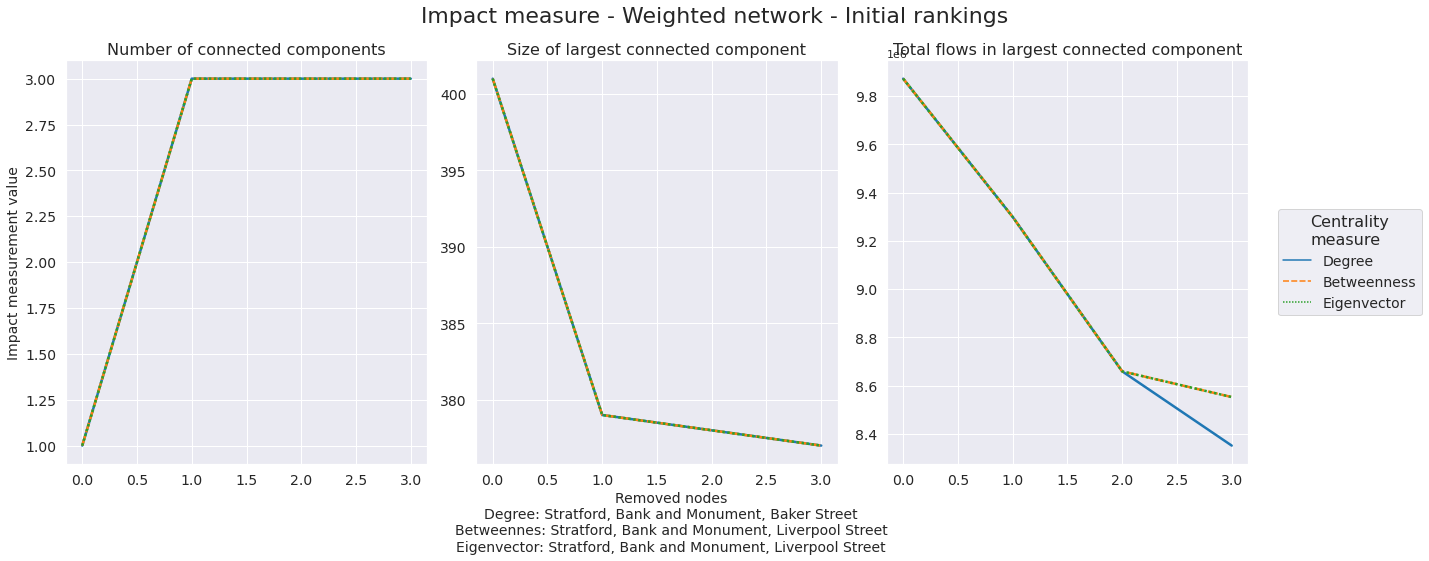

In [95]:
# Testing code
fig, [ax1,ax2,ax3] = plt.subplots(1, 3, sharey=False, tight_layout=True,figsize=(20, 7))
plt.suptitle('Impact measure - Weighted network - Initial rankings',fontsize=22)
ax1.set_ylabel("Impact measurement value",fontsize=14)
# sns.lineplot(data=w_results_df, x="Removed nodes", y="Diameter",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure', linewidth = 2.5)
# sns.lineplot(data=w_results_df, x="Removed nodes", y="Average shortest path",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=w_results_df, x="Removed nodes", y="Number of connected components",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=w_results_df, x="Removed nodes", y="Size of largest connected component",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=w_results_df, x="Removed nodes", y="Total flows in largest connected component",palette="tab10",hue='Centrality measure',ax=ax3,style='Centrality measure',linewidth = 2.5)


# ax1.set_title("Diameter",fontsize=16)
# ax2.set_title("Average shortest path",fontsize=16)
ax1.set_title("Number of connected components",fontsize=16)
ax2.set_title("Size of largest connected component",fontsize=16)
ax3.set_title("Total flows in largest connected component",fontsize=16)

ax2.set_ylabel('')
ax3.set_ylabel('')
# ax4.set_ylabel('')

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
# ax4.set_ylabel('')

# ax1.set_xticklabels([])
# ax2.set_xticklabels([]) # remove lable axis
# ax3.set_xticks([])


ax1.get_legend().remove()
ax2.get_legend().remove()
# ax3.get_legend().remove()
plt.legend(bbox_to_anchor=(1.5, 0.5),loc='center right',title='Centrality\nmeasure',fontsize=14,title_fontsize=16)

# ax1.set_xlabel("Removed nodes\nDegree: " + ', '.join(degree_rank[0:3]),fontsize=14)
# ax2.set_xlabel("Removed nodes",fontsize=14)
# ax3.set_xlabel("Removed nodes",fontsize=14)
# ax3.set_xlabel("Removed nodes",fontsize=14)
# ax4.set_xlabel("Removed nodes",fontsize=14)

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
	label.set_fontsize(14)

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
	label.set_fontsize(14)
    
for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
	label.set_fontsize(14)

# plt.xlabel("common X")
    
# for label in (ax4.get_xticklabels() + ax4.get_yticklabels()):
# 	label.set_fontsize(14)
    
# plt.savefig("Dis_line_ratio_meta_M1_M2_M3.jpg",dpi=300)
fig.text(0.47, -0.1, 'Removed nodes\n' + 'Degree: ' + ', '.join(degree_rank[0:3]) + '\nBetweennes: ' + ', '.join(bet_rank[0:3]) + '\nEigenvector: ' + ', '.join(eig_rank[0:3]), ha='center',fontsize=14)

plt.savefig('Results_Impact_Measures_Initial_Rankings.jpg',dpi=300,bbox_inches='tight')

In [96]:
# ranks = [degree_rank, clos_rank, bet_rank, eig_rank]

In [97]:
degree_rank[0:3]

['Stratford', 'Bank and Monument', 'Baker Street']

In [98]:
', '.join(degree_rank[0:3])

'Stratford, Bank and Monument, Baker Street'

In [99]:
', '.join(bet_rank[0:3])

'Stratford, Bank and Monument, Liverpool Street'

In [100]:
', '.join(eig_rank[0:3])

'Stratford, Bank and Monument, Liverpool Street'

In [101]:
# Create a blank df
w_results_rerun_df = pd.DataFrame()
#Create empy columns
w_results_rerun_df['Nodes'] = np.nan
w_results_rerun_df['Removed nodes'] = np.nan
w_results_rerun_df['Diameter'] = np.nan
w_results_rerun_df['Average shortest path'] = np.nan
w_results_rerun_df['Number of connected components'] = np.nan
w_results_rerun_df['Size of largest connected component'] = np.nan
w_results_rerun_df['Total flows in largest connected component'] = np.nan
w_results_rerun_df['Node removed'] = np.nan

In [102]:
w_results_rerun_df

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Total flows in largest connected component,Node removed


In [103]:
# List of weighted ranking lists
ranks_w = [degree_rank, clos_rank_w, bet_rank_w, eig_rank_w]

In [104]:
# Testing code
# For loop to calculate impact measures
counter = 0
for r in ranks_w:
    #print(r)
    G_w = G_copy.copy()

    for station in r[0:4]: 
        # Remove a node from the graph
        
        #print(station) 
        #G_i.remove_node(station) # Erasing before the first impact measurement is performed

        # Check if the graph is connected
        if nx.is_connected(G_w):
            # Calculate the number of nodes in the graph
            nodes = nx.number_of_nodes(G_w)
            # Number of removed nodes
            re_nodes = G_copy.number_of_nodes() - G_w.number_of_nodes()
            # Diameter
            diameter = nx.diameter(G_w)
            #Average shortest path of the connected component
            avr_shortest = nx.average_shortest_path_length(G_w)
            # Number of connected componets
            num_con = nx.number_connected_components(G_w)
            # Size of the largest component
            components = nx.connected_components(G_w)
            # Use the max() command to find the largest one:
            largest_component = max(components, key=len)
            # Create a "subgraph" of the largest component
            Largest_subgraph = G_w.subgraph(largest_component)
            size_lar_com = Largest_subgraph.number_of_nodes()
            # Total flows of connected componnets
            total_flows=sum({flows for e1, e2, flows in Largest_subgraph.edges(data='flows')})
            # Node removed for label
            node_removed = 'None' if (r.index(station) == 0) else (r[r.index(station)-1])
            

            # Add the station, number of nodes, and diameter to the DataFrame
            # non_sq = non_sq.append({'Nodes': nodes, 'Removed nodes': re_nodes, 'Diameter for largest component': diameter,'Average shortest path':avr_shortest}, ignore_index=True)
            w_results_rerun_df = pd.concat([w_results_rerun_df, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter': [diameter],'Average shortest path':[avr_shortest], 'Centrality measure':labels[counter], 'Number of connected components': num_con, 'Size of largest connected component':size_lar_com,'Total flows in largest connected component':total_flows, 'Node removed': node_removed})], ignore_index=True)
            G_w.remove_node(station)
        else:
            # Find the largest connected component
            lar_component = max(nx.connected_components(G_w), key=len)
            # Create a subgraph of the largest connected component
            Largest_subgraph = G_w.subgraph(lar_component)
            # Calculate the number of nodes in the subgraph
            nodes = nx.number_of_nodes(G_w)
            # Number of removed nodes
            re_nodes = G_copy.number_of_nodes() - G_w.number_of_nodes()
            # Calculate the diameter of the largest connedted component
            diameter = nx.diameter(Largest_subgraph)
            # Average shortest path of the largest connedted component
            avr_shortest = nx.average_shortest_path_length(Largest_subgraph)
            # Number of connected componets
            num_con = nx.number_connected_components(G_w)
            # Size of the largest component
            size_lar_com = Largest_subgraph.number_of_nodes()
            # Total flows of connected componnets
            total_flows=sum({flows for e1, e2, flows in Largest_subgraph.edges(data='flows')})
            # Node removed for label
            node_removed = 'None' if (r.index(station) == 0) else (r[r.index(station)-1])

            # Add the station, number of nodes, and diameter to the DataFrame
            w_results_rerun_df = pd.concat([w_results_rerun_df, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter': [diameter],'Average shortest path':[avr_shortest], 'Centrality measure':labels[counter], 'Number of connected components': num_con, 'Size of largest connected component':size_lar_com,'Total flows in largest connected component':total_flows,'Node removed': node_removed})], ignore_index=True)
            G_w.remove_node(station)
        
    counter += 1
        
    #print(counter)
        

In [105]:
w_results_rerun_df

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Total flows in largest connected component,Node removed,Centrality measure
0,401.0,0.0,36.0,13.545998,1.0,401.0,9872126.0,None,Degree
1,400.0,1.0,49.0,14.496447,3.0,379.0,9299438.0,Stratford,Degree
2,399.0,2.0,49.0,14.872497,3.0,378.0,8659707.0,Bank and Monument,Degree
3,398.0,3.0,49.0,15.686438,3.0,377.0,8352128.0,Baker Street,Degree
4,401.0,0.0,36.0,13.545998,1.0,401.0,9872126.0,None,Closeness
5,400.0,1.0,36.0,13.824536,1.0,400.0,9248394.0,Green Park,Closeness
6,399.0,2.0,38.0,14.021058,1.0,399.0,8984287.0,Westminster,Closeness
7,398.0,3.0,38.0,14.221612,1.0,398.0,8624162.0,Waterloo,Closeness
8,401.0,0.0,36.0,13.545998,1.0,401.0,9872126.0,None,Betweenness
9,400.0,1.0,36.0,13.824536,1.0,400.0,9248394.0,Green Park,Betweenness


In [106]:
w_results_rerun_df[w_results_rerun_df['Removed nodes'] ==1]

,Nodes,Removed nodes,Diameter,Average shortest path,Number of connected components,Size of largest connected component,Total flows in largest connected component,Node removed,Centrality measure
1,400.0,1.0,49.0,14.496447,3.0,379.0,9299438.0,Stratford,Degree
5,400.0,1.0,36.0,13.824536,1.0,400.0,9248394.0,Green Park,Closeness
9,400.0,1.0,36.0,13.824536,1.0,400.0,9248394.0,Green Park,Betweenness
13,400.0,1.0,38.0,13.960802,1.0,400.0,9313794.0,Waterloo,Eigenvector


In [107]:
# Subsetting the df for plotting
w_results_rerun_df = w_results_rerun_df[(w_results_rerun_df['Centrality measure']=='Degree') | (w_results_rerun_df['Centrality measure']=='Betweenness') | (w_results_rerun_df['Centrality measure']=='Eigenvector')]

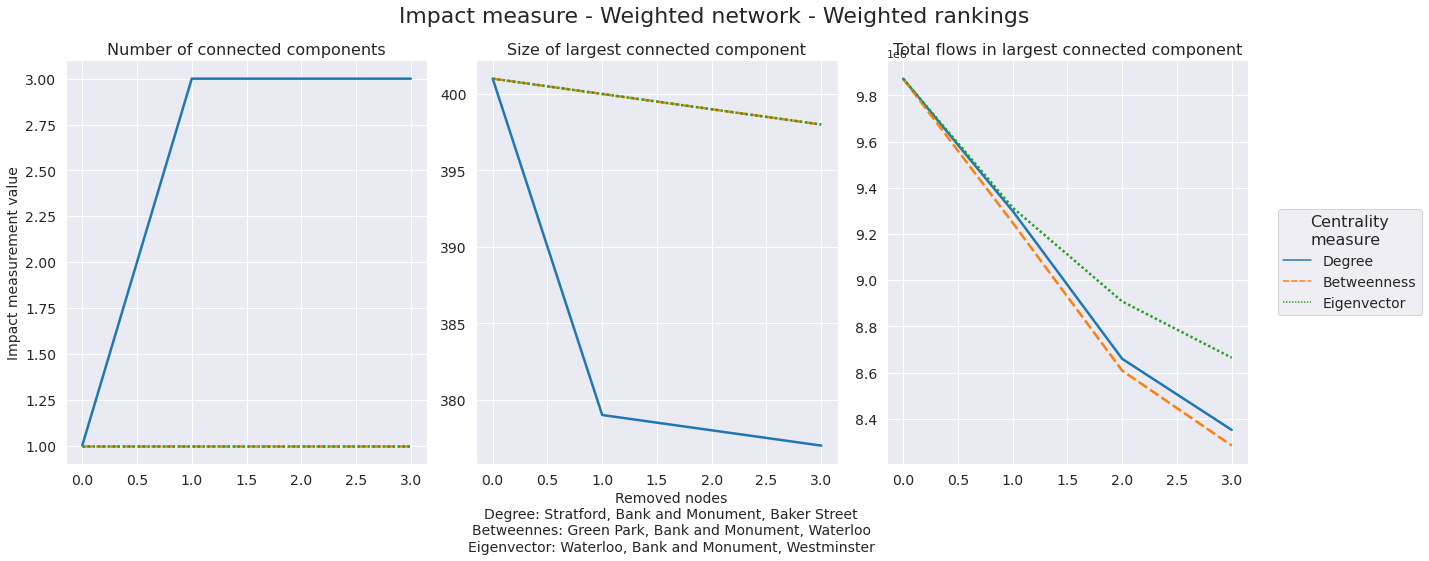

In [108]:
# Testing code
fig, [ax1,ax2,ax3] = plt.subplots(1, 3, sharey=False, tight_layout=True,figsize=(20, 7))
plt.suptitle('Impact measure - Weighted network - Weighted rankings',fontsize=22)
ax1.set_ylabel("Impact measurement value",fontsize=14)
# sns.lineplot(data=w_results_df, x="Removed nodes", y="Diameter",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure', linewidth = 2.5)
# sns.lineplot(data=w_results_df, x="Removed nodes", y="Average shortest path",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=w_results_rerun_df, x="Removed nodes", y="Number of connected components",palette="tab10",hue='Centrality measure',ax=ax1,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=w_results_rerun_df, x="Removed nodes", y="Size of largest connected component",palette="tab10",hue='Centrality measure',ax=ax2,style='Centrality measure',linewidth = 2.5)
sns.lineplot(data=w_results_rerun_df, x="Removed nodes", y="Total flows in largest connected component",palette="tab10",hue='Centrality measure',ax=ax3,style='Centrality measure',linewidth = 2.5)


# ax1.set_title("Diameter",fontsize=16)
# ax2.set_title("Average shortest path",fontsize=16)
ax1.set_title("Number of connected components",fontsize=16)
ax2.set_title("Size of largest connected component",fontsize=16)
ax3.set_title("Total flows in largest connected component",fontsize=16)

ax2.set_ylabel('')
ax3.set_ylabel('')
# ax4.set_ylabel('')

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')

# ax1.set_yticklabels([])
# ax2.set_yticklabels([]) # remove lable axis
# ax2.set_yticks([])


ax1.get_legend().remove()
ax2.get_legend().remove()
# ax3.get_legend().remove()
plt.legend(bbox_to_anchor=(1.5, 0.5),loc='center right',title='Centrality\nmeasure',fontsize=14,title_fontsize=16)

# ax1.set_xlabel("Removed nodes",fontsize=14)
# ax2.set_xlabel("Removed nodes",fontsize=14)
# ax3.set_xlabel("Removed nodes",fontsize=14)
# ax3.set_xlabel("Removed nodes",fontsize=14)
# ax4.set_xlabel("Removed nodes",fontsize=14)

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
	label.set_fontsize(14)

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
	label.set_fontsize(14)
    
for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
	label.set_fontsize(14)
    
# for label in (ax4.get_xticklabels() + ax4.get_yticklabels()):
# 	label.set_fontsize(14)
    
# plt.savefig("Dis_line_ratio_meta_M1_M2_M3.jpg",dpi=300)
fig.text(0.47, -0.1, 'Removed nodes\n' + 'Degree: ' + ', '.join(degree_rank[0:3]) + '\nBetweennes: ' + ', '.join(bet_rank_w[0:3]) + '\nEigenvector: ' + ', '.join(eig_rank_w[0:3]), ha='center',fontsize=14)
plt.savefig('Results_Impact_Measures_Weighted_Rankings.jpg',dpi=300,bbox_inches='tight')

# Spatial interaction models

In [109]:
# Data review

In [110]:
OD.head()

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32,599
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1224
Acton Town,0,0,0,3,17,0,35,0,0,11,...,77,3,6,9,0,0,0,0,0,3745
Aldgate,0,0,0,0,0,0,0,0,0,17,...,0,0,4,8,0,0,0,0,0,2886
Aldgate East,0,0,2,0,0,0,0,0,0,20,...,24,0,0,12,0,1,0,1,0,3172


In [111]:
london_OD_AMpeak.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


**Check for intra station flows flows**

In [112]:
london_OD_AMpeak[london_OD_AMpeak.station_origin == london_OD_AMpeak.station_destination]

,station_origin,station_destination,flows,population,jobs,distance
4985,Blackfriars,Blackfriars,1,6781,10849,0.0
8847,Canary Wharf,Canary Wharf,0,14632,58772,0.0
9444,Cannon Street,Cannon Street,0,3874,4698,0.0
16611,Elephant & Castle,Elephant & Castle,0,9325,6427,0.0
17552,Euston,Euston,0,17796,16800,0.0
17807,Euston Square,Euston Square,0,4926,8093,0.0
18940,Finsbury Park,Finsbury Park,0,24735,6769,0.0
21752,Hackney Central,Hackney Central,0,3370,2440,0.0
21809,Hackney Downs,Hackney Downs,1,843,835,0.0
22242,Hammersmith,Hammersmith,0,11818,18250,0.0


In [113]:
london_OD_AMpeak["TotalNoIntra"] = london_OD_AMpeak.apply(lambda x: 0 if x['station_origin'] == x['station_destination'] else x['flows'], axis=1)

In [114]:
london_OD_AMpeak

,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,0
1,Abbey Road,Beckton,1,599,442,8510.121774,1
2,Abbey Road,Blackwall,3,599,665,3775.448872,3
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,1
4,Abbey Road,Canning Town,37,599,15428,2228.923167,37
...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,127
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,608
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,6
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,81


In [115]:
# Pivot table for new OD matrix
london_OD_AMpeak_pivot = pd.pivot_table(london_OD_AMpeak, values ="TotalNoIntra", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
london_OD_AMpeak_pivot

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [116]:
# # Pivot table for new OD matrix
# london_OD_AMpeak_pivot = pd.pivot_table(london_OD_AMpeak, values ="TotalNoIntra", index="station_origin", columns = "station_destination",
#                             aggfunc=np.sum, margins=True)
# london_OD_AMpeak_pivot

## Model and calibration

### Review the data

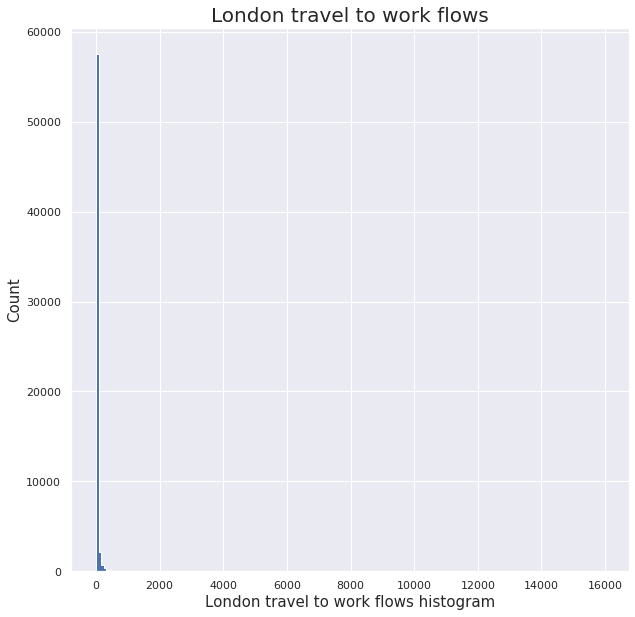

In [117]:
plt.subplots(figsize=(10,10))

plt.hist(london_OD_AMpeak["TotalNoIntra"], histtype="stepfilled" , bins = 200)
plt.xlabel("London travel to work flows histogram", fontsize = 15)
plt.ylabel("Count", fontsize= 15)
plt.title("London travel to work flows", fontsize = 20)
plt.grid(True)

Text(0, 0.5, 'log(Total)')

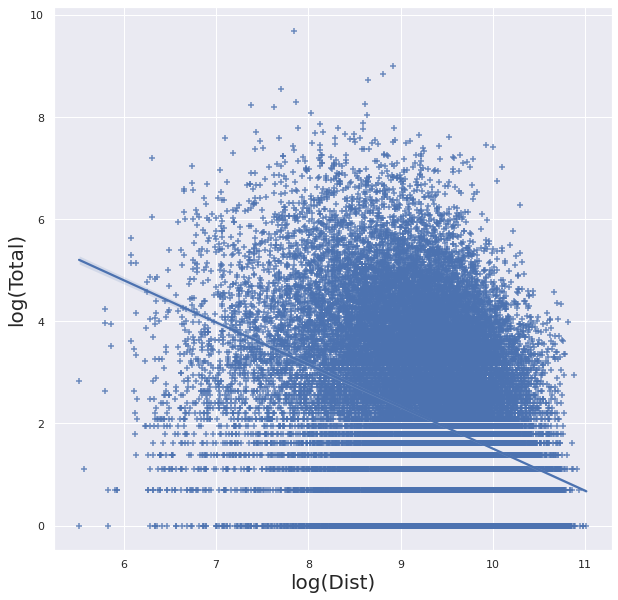

In [118]:
#subset the dataframe to the flows we want
london_OD_AMpeak_flows = london_OD_AMpeak[["TotalNoIntra", "distance"]]
#remove all 0 values (logarithms can't deal with 0 values)
london_OD_AMpeak_flows = london_OD_AMpeak_flows[(london_OD_AMpeak_flows!=0).all(1)]

#extract the x and y converting to log
x = np.log(london_OD_AMpeak_flows["distance"])
y = np.log(london_OD_AMpeak_flows["TotalNoIntra"])

#create the subplot
fig, ax = plt.subplots(figsize = (10,10))
#plot the results along with the line of best fit
sns.regplot(x=x, y=y, marker="+", ax=ax)
ax.set_xlabel("log(Dist)", fontsize = 20)
ax.set_ylabel("log(Total)", fontsize = 20)

### Run the initial model

In [119]:
O_i = pd.DataFrame(london_OD_AMpeak.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
london_OD_AMpeak = london_OD_AMpeak.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(london_OD_AMpeak.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
london_OD_AMpeak = london_OD_AMpeak.merge(D_j, on = "station_destination", how = "left" )

#### Transform variables of interest

In [120]:
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    london_OD_AMpeak[f"log_{x}"] = np.log(london_OD_AMpeak[x]+1)
    log_x_vars.append(f"log_{x}")

In [121]:
london_OD_AMpeak

,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra,O_i,D_j,log_population,log_jobs,log_distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,0,599,78549,6.396930,11.271491,9.003627
1,Abbey Road,Beckton,1,599,442,8510.121774,1,599,442,6.396930,6.093570,9.049129
2,Abbey Road,Blackwall,3,599,665,3775.448872,3,599,665,6.396930,6.501290,8.236539
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,1,599,58772,6.396930,10.981438,8.534545
4,Abbey Road,Canning Town,37,599,15428,2228.923167,37,599,15428,6.396930,9.644004,7.709722
...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,127,7892,3342,8.973732,8.114624,9.503219
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,608,7892,5487,8.973732,8.610319,9.071360
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,6,7892,400,8.973732,5.993961,9.163010
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,81,7892,893,8.973732,6.795706,8.586019


In [122]:
london_OD_AMpeak[london_OD_AMpeak.population==0].head()

,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra,O_i,D_j,log_population,log_jobs,log_distance
3795,Battersea Park,Brockley,0,0,468,13201.698809,0,0,468,0.0,6.150603,9.488177
3796,Battersea Park,Canada Water,0,0,20443,10440.366798,0,0,20443,0.0,9.925445,9.253531
3797,Battersea Park,Clapham High Street,0,0,1296,1790.459591,0,0,1296,0.0,7.167809,7.490786
3798,Battersea Park,Dalston Junction,0,0,1289,17192.960480,0,0,1289,0.0,7.162397,9.752313
3799,Battersea Park,Denmark Hill,0,0,2612,5032.444704,0,0,2612,0.0,7.868254,8.523860


In [123]:
london_OD_AMpeak[london_OD_AMpeak.jobs==0].head()

,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra,O_i,D_j,log_population,log_jobs,log_distance
7045,Brockley,Battersea Park,0,2322,0,13201.698809,0,2322,0,7.750615,0.0,9.488177
8518,Canada Water,Battersea Park,0,27026,0,10440.366798,0,27026,0,10.204592,0.0,9.253531
11571,Clapham High Street,Battersea Park,0,1500,0,1790.459591,0,1500,0,7.313887,0.0,7.490786
13687,Dalston Junction,Battersea Park,0,3912,0,17192.960480,0,3912,0,8.272060,0.0,9.752313
13967,Denmark Hill,Battersea Park,0,1844,0,5032.444704,0,1844,0,7.520235,0.0,8.523860


In [124]:
london_OD_AMpeak[london_OD_AMpeak.distance==0].head()

,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra,O_i,D_j,log_population,log_jobs,log_distance
4985,Blackfriars,Blackfriars,1,6781,10849,0.0,0,6781,10849,8.822027,9.291920,0.0
8847,Canary Wharf,Canary Wharf,0,14632,58772,0.0,0,14632,58772,9.591035,10.981438,0.0
9444,Cannon Street,Cannon Street,0,3874,4698,0.0,0,3874,4698,8.262301,8.455105,0.0
16611,Elephant & Castle,Elephant & Castle,0,9325,6427,0.0,0,9325,6427,9.140561,8.768419,0.0
17552,Euston,Euston,0,17796,16800,0.0,0,17796,16800,9.786785,9.729194,0.0


In [125]:
london_OD_AMpeak[london_OD_AMpeak.station_destination=='Canary Wharf'].head()

,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra,O_i,D_j,log_population,log_jobs,log_distance
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,1,599,58772,6.396930,10.981438,8.534545
126,Acton Town,Canary Wharf,57,3745,58772,20398.165882,57,3745,58772,8.228444,10.981438,9.923249
348,Aldgate,Canary Wharf,1,2886,58772,6564.419680,1,2886,58772,7.967973,10.981438,8.789572
595,Aldgate East,Canary Wharf,3,3172,58772,5127.998899,3,3172,58772,8.062433,10.981438,8.542666
817,All Saints,Canary Wharf,67,740,58772,1340.088733,67,740,58772,6.608001,10.981438,7.201237


#### Run Poisson distribution loged variables

In [126]:
#create the formula (the "-1" indicates no intercept in the regression model).
attr_form = 'flows ~ station_origin + log_jobs + log_distance-1'
#run a production constrained sim
prodSim = smf.glm(formula = attr_form, data=london_OD_AMpeak, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61474
Model:                            GLM   Df Residuals:                    61073
Model Family:                 Poisson   Df Model:                          400
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1901e+06
Date:                Tue, 02 May 2023   Deviance:                   2.2080e+06
Time:                        08:33:54   Pearson chi2:                 3.83e+06
No. Iterations:                    26   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

#### Goodnes of fit

In [145]:
# Functions to measure goodness of fit
def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

### Extracting the coeficients from previous Production model

In [127]:
#create a coefficients dataframe from the attrSim model
coefs = pd.DataFrame(prodSim.params)

In [128]:
coefs

,0
station_origin[Abbey Road],-1.675012
station_origin[Acton Central],-0.720268
station_origin[Acton Town],-1.280058
station_origin[Aldgate],-1.820035
station_origin[Aldgate East],-1.732795
...,...
station_origin[Woodgrange Park],-0.424258
station_origin[Woodside Park],-1.345071
station_origin[Woolwich Arsenal],1.167034
log_jobs,0.792663


In [129]:
#call the coefficients Gamma_j
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)

In [131]:
coefs

,coef,alpha_i
0,station_origin[Abbey Road],-1.675012
1,station_origin[Acton Central],-0.720268
2,station_origin[Acton Town],-1.280058
3,station_origin[Aldgate],-1.820035
4,station_origin[Aldgate East],-1.732795
...,...,...
396,station_origin[Woodgrange Park],-0.424258
397,station_origin[Woodside Park],-1.345071
398,station_origin[Woolwich Arsenal],1.167034
399,log_jobs,0.792663


In [132]:
# replace the unnecessary DestCodeNew and [] in the
#coefficients column of the coefs DataFrame
to_repl = ["station_origin", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")   

/tmp/ipykernel_4330/838570587.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


In [133]:
coefs

,coef,alpha_i
0,Abbey Road,-1.675012
1,Acton Central,-0.720268
2,Acton Town,-1.280058
3,Aldgate,-1.820035
4,Aldgate East,-1.732795
...,...,...
396,Woodgrange Park,-0.424258
397,Woodside Park,-1.345071
398,Woolwich Arsenal,1.167034
399,log_jobs,0.792663


In [135]:
#then once you have done this you can join them back into the dataframes
london_OD_AMpeak = london_OD_AMpeak.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
london_OD_AMpeak.drop(columns = ["coef"], inplace = True)
#check this has worked
london_OD_AMpeak.head()

,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra,O_i,D_j,log_population,log_jobs,log_distance,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,0,599,78549,6.39693,11.271491,9.003627,-1.675012
1,Abbey Road,Beckton,1,599,442,8510.121774,1,599,442,6.39693,6.093570,9.049129,-1.675012
2,Abbey Road,Blackwall,3,599,665,3775.448872,3,599,665,6.39693,6.501290,8.236539,-1.675012
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,1,599,58772,6.39693,10.981438,8.534545,-1.675012
4,Abbey Road,Canning Town,37,599,15428,2228.923167,37,599,15428,6.39693,9.644004,7.709722,-1.675012


In [ ]:
london_OD_AMpeak.columns

### Extracting alpha and beta from previous attraction model

In [136]:
#extract alpha and beta from the
#attrSim model
alpha_i= prodSim.params[0:399]
gamma = prodSim.params[399]
beta = -prodSim.params[400]

In [137]:
alpha_i

station_origin[Abbey Road]         -1.675012
station_origin[Acton Central]      -0.720268
station_origin[Acton Town]         -1.280058
station_origin[Aldgate]            -1.820035
station_origin[Aldgate East]       -1.732795
                                      ...   
station_origin[Wood Street]        -0.490302
station_origin[Woodford]           -0.912911
station_origin[Woodgrange Park]    -0.424258
station_origin[Woodside Park]      -1.345071
station_origin[Woolwich Arsenal]    1.167034
Length: 399, dtype: float64

In [138]:
gamma

0.7926631750157576

In [139]:
beta

0.27968850330227507

### Raw result with new wage of if scenario (without recalculating balancing factores)

In [141]:
london_OD_AMpeak["prodsimest1"] = np.exp(london_OD_AMpeak["alpha_i"]+gamma*london_OD_AMpeak["log_jobs"] 
                                 - beta*london_OD_AMpeak["log_distance"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
london_OD_AMpeak.head(5)

,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra,O_i,D_j,log_population,log_jobs,log_distance,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,0,599,78549,6.39693,11.271491,9.003627,-1.675012,114.579881
1,Abbey Road,Beckton,1,599,442,8510.121774,1,599,442,6.39693,6.093570,9.049129,-1.675012,1.866749
2,Abbey Road,Blackwall,3,599,665,3775.448872,3,599,665,6.39693,6.501290,8.236539,-1.675012,3.237026
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,1,599,58772,6.39693,10.981438,8.534545,-1.675012,103.809235
4,Abbey Road,Canning Town,37,599,15428,2228.923167,37,599,15428,6.39693,9.644004,7.709722,-1.675012,45.291246


Compared to...

In [142]:
london_OD_AMpeak["prodsimest1"] = round(london_OD_AMpeak["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
london_OD_AMpeak_pivot_3 = london_OD_AMpeak.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
london_OD_AMpeak_pivot_3

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,598.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1224.0
Acton Town,NaN,NaN,NaN,22.0,22.0,NaN,5.0,1.0,NaN,23.0,...,19.0,3.0,7.0,8.0,NaN,3.0,NaN,3.0,NaN,3742.0
Aldgate,NaN,NaN,5.0,NaN,26.0,NaN,NaN,1.0,NaN,21.0,...,11.0,NaN,5.0,4.0,NaN,2.0,NaN,2.0,NaN,2887.0
Aldgate East,NaN,NaN,5.0,28.0,NaN,NaN,2.0,1.0,NaN,22.0,...,11.0,2.0,5.0,4.0,NaN,2.0,NaN,2.0,NaN,3168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,10.0,33.0,34.0,NaN,NaN,NaN,NaN,32.0,...,22.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,4869.0
Woodgrange Park,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529.0
Woodside Park,NaN,NaN,7.0,21.0,21.0,NaN,3.0,NaN,NaN,22.0,...,15.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,3097.0


Compared to

In [143]:
london_OD_AMpeak_pivot

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [146]:
CalcRSquared(london_OD_AMpeak["flows"], london_OD_AMpeak["prodsimest1"])

0.2196339056014395

In [148]:
CalcRMSE(london_OD_AMpeak["flows"], london_OD_AMpeak["prodsimest1"])

120.406

## Scenarios

### Scenario A

In [149]:
#create a new pop function to change the value with

def new_jobs(row):
    if row["station_destination"] == "Canary Wharf":
        val = 58772/2
    else:
        val = row["jobs"]
    return val

london_OD_AMpeak["jobs_scenario"] = london_OD_AMpeak.apply(new_jobs, axis=1)
#create a variable called Oi2_origpop_scenario while applying the new_pop function
london_OD_AMpeak.head(5)
#check the result to make sure it has been applied

,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra,O_i,D_j,log_population,log_jobs,log_distance,alpha_i,prodsimest1,jobs_scenario
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,0,599,78549,6.39693,11.271491,9.003627,-1.675012,115.0,78549.0
1,Abbey Road,Beckton,1,599,442,8510.121774,1,599,442,6.39693,6.093570,9.049129,-1.675012,2.0,442.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,3,599,665,6.39693,6.501290,8.236539,-1.675012,3.0,665.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,1,599,58772,6.39693,10.981438,8.534545,-1.675012,104.0,29386.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,37,599,15428,6.39693,9.644004,7.709722,-1.675012,45.0,15428.0


In [150]:
london_OD_AMpeak["prodsimest2"] = np.exp(london_OD_AMpeak["alpha_i"]+gamma*np.log(london_OD_AMpeak["jobs_scenario"]) - beta*london_OD_AMpeak["log_distance"])

london_OD_AMpeak["prodsimest2"] = round(london_OD_AMpeak["prodsimest2"],0)
#now we can convert the pivot table into a matrix
london_OD_AMpeak_pivot_4 = london_OD_AMpeak.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
london_OD_AMpeak_pivot_4

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,554.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1224.0
Acton Town,NaN,NaN,NaN,22.0,22.0,NaN,5.0,1.0,NaN,23.0,...,19.0,3.0,7.0,8.0,NaN,3.0,NaN,3.0,NaN,3697.0
Aldgate,NaN,NaN,5.0,NaN,26.0,NaN,NaN,1.0,NaN,21.0,...,11.0,NaN,5.0,4.0,NaN,2.0,NaN,2.0,NaN,2850.0
Aldgate East,NaN,NaN,5.0,28.0,NaN,NaN,2.0,1.0,NaN,22.0,...,11.0,2.0,5.0,4.0,NaN,2.0,NaN,2.0,NaN,3126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,10.0,33.0,34.0,NaN,NaN,NaN,NaN,32.0,...,22.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,4798.0
Woodgrange Park,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,528.0
Woodside Park,NaN,NaN,7.0,21.0,21.0,NaN,3.0,NaN,NaN,22.0,...,15.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,3057.0


In [151]:
#calculate some new Dj^gamma and d_ij^beta values
Dj2_gamma = london_OD_AMpeak["jobs"]**gamma
dist_beta = london_OD_AMpeak["distance"]**(-beta)
#calcualte the first stage of the Ai values
london_OD_AMpeak["Ai1"] = Dj2_gamma * dist_beta

In [152]:
#now do the sum over all js bit
A_i = pd.DataFrame(london_OD_AMpeak.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1 based on ecuation number 3
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)

In [153]:
#and write the A_i values back into the dataframe
london_OD_AMpeak = london_OD_AMpeak.merge(A_i, left_on="station_origin", right_index=True, how="left")
london_OD_AMpeak.head(5)

,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra,O_i,D_j,log_population,log_jobs,log_distance,alpha_i,prodsimest1,jobs_scenario,prodsimest2,Ai1,A_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,0,599,78549,6.39693,11.271491,9.003627,-1.675012,115.0,78549.0,115.0,611.740990,0.000313
1,Abbey Road,Beckton,1,599,442,8510.121774,1,599,442,6.39693,6.093570,9.049129,-1.675012,2.0,442.0,2.0,9.948806,0.000313
2,Abbey Road,Blackwall,3,599,665,3775.448872,3,599,665,6.39693,6.501290,8.236539,-1.675012,3.0,665.0,3.0,17.262742,0.000313
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,1,599,58772,6.39693,10.981438,8.534545,-1.675012,104.0,29386.0,60.0,554.246132,0.000313
4,Abbey Road,Canning Town,37,599,15428,2228.923167,37,599,15428,6.39693,9.644004,7.709722,-1.675012,45.0,15428.0,45.0,241.821607,0.000313


In [154]:
#to check everything works, recreate the original estimates
london_OD_AMpeak["prodsimest3"] = london_OD_AMpeak["A_i"]*london_OD_AMpeak["O_i"]*Dj2_gamma*dist_beta
#round
london_OD_AMpeak["prodsimest3"] = round(london_OD_AMpeak["prodsimest3"])
#check
london_OD_AMpeak[["prodsimest1", "prodsimest3"]]

,prodsimest1,prodsimest3
0,115.0,115.0
1,2.0,2.0
2,3.0,3.0
3,104.0,104.0
4,45.0,45.0
...,...,...
61469,140.0,140.0
61470,234.0,234.0
61471,29.0,29.0
61472,64.0,64.0


### Calculating new balancing factor $A_i$ for the what if scenario

In [155]:
#calculate some new Dj^gamma and d_ij^beta values
Dj3_gamma = london_OD_AMpeak["jobs_scenario"]**gamma
#calcualte the first stage of the Ai values
london_OD_AMpeak["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(london_OD_AMpeak.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
london_OD_AMpeak = london_OD_AMpeak.merge(A_i, left_on="station_origin", right_index=True, how="left")

### Model flow using new balancing factors for the what if scenario

In [156]:
#to check everything works, recreate the original estimates
london_OD_AMpeak["prodsimest4"] = london_OD_AMpeak["A_i2"]*london_OD_AMpeak["O_i"]*Dj3_gamma*dist_beta
#round
london_OD_AMpeak["prodsimest4"] = round(london_OD_AMpeak["prodsimest4"])

In [157]:
london_OD_AMpeak_pivot_4 = london_OD_AMpeak.pivot_table(values ="prodsimest4", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
london_OD_AMpeak_pivot_4

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1224.0
Acton Town,NaN,NaN,NaN,22.0,23.0,NaN,5.0,1.0,NaN,24.0,...,19.0,3.0,7.0,8.0,NaN,3.0,NaN,3.0,NaN,3742.0
Aldgate,NaN,NaN,5.0,NaN,26.0,NaN,NaN,1.0,NaN,21.0,...,11.0,NaN,5.0,4.0,NaN,2.0,NaN,2.0,NaN,2882.0
Aldgate East,NaN,NaN,5.0,28.0,NaN,NaN,2.0,1.0,NaN,22.0,...,12.0,2.0,6.0,4.0,NaN,2.0,NaN,2.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,10.0,33.0,35.0,NaN,NaN,NaN,NaN,33.0,...,23.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,4871.0
Woodgrange Park,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529.0
Woodside Park,NaN,NaN,7.0,21.0,21.0,NaN,3.0,NaN,NaN,23.0,...,15.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


### Scenario B

In [160]:
betax2 = beta*2

In [162]:
#calculate some new Dj^gamma and d_ij^beta values
Dj2_gamma = london_OD_AMpeak["jobs"]**gamma
dist_beta = london_OD_AMpeak["distance"]**(-betax2)
#calcualte the first stage of the Ai values
london_OD_AMpeak["Ai1"] = Dj2_gamma * dist_beta

In [163]:
#now do the sum over all js bit
A_i = pd.DataFrame(london_OD_AMpeak.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1 based on ecuation number 3
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)

In [164]:
#and write the A_i values back into the dataframe
london_OD_AMpeak = london_OD_AMpeak.merge(A_i, left_on="station_origin", right_index=True, how="left")
london_OD_AMpeak.head(5)

,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra,O_i,D_j,log_population,...,alpha_i,prodsimest1,jobs_scenario,prodsimest2,Ai1,A_i_x,prodsimest3,A_i2,prodsimest4,A_i_y
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,0,599,78549,6.39693,...,-1.675012,115.0,78549.0,115.0,49.310275,0.000313,115.0,0.000337,124.0,0.002901
1,Abbey Road,Beckton,1,599,442,8510.121774,1,599,442,6.39693,...,-1.675012,2.0,442.0,2.0,0.791796,0.000313,2.0,0.000337,2.0,0.002901
2,Abbey Road,Blackwall,3,599,665,3775.448872,3,599,665,6.39693,...,-1.675012,3.0,665.0,3.0,1.724538,0.000313,3.0,0.000337,3.0,0.002901
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,1,599,58772,6.39693,...,-1.675012,104.0,29386.0,60.0,50.940070,0.000313,104.0,0.000337,65.0,0.002901
4,Abbey Road,Canning Town,37,599,15428,2228.923167,37,599,15428,6.39693,...,-1.675012,45.0,15428.0,45.0,27.994415,0.000313,45.0,0.000337,49.0,0.002901


In [165]:
#to check everything works, recreate the original estimates
london_OD_AMpeak["prodsimest5"] = london_OD_AMpeak["A_i_y"]*london_OD_AMpeak["O_i"]*Dj2_gamma*dist_beta
#round
london_OD_AMpeak["prodsimest5"] = round(london_OD_AMpeak["prodsimest5"])
#check
london_OD_AMpeak[["prodsimest1", "prodsimest5"]]

,prodsimest1,prodsimest5
0,115.0,86.0
1,2.0,1.0
2,3.0,3.0
3,104.0,89.0
4,45.0,49.0
...,...,...
61469,140.0,129.0
61470,234.0,244.0
61471,29.0,29.0
61472,64.0,76.0


In [159]:
betax4 = beta*4

In [166]:
#calculate some new Dj^gamma and d_ij^beta values
Dj2_gamma = london_OD_AMpeak["jobs"]**gamma
dist_beta = london_OD_AMpeak["distance"]**(-betax4)
#calcualte the first stage of the Ai values
london_OD_AMpeak["Ai1"] = Dj2_gamma * dist_beta

In [ ]:
#now do the sum over all js bit
A_i = pd.DataFrame(london_OD_AMpeak.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1 based on ecuation number 3
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)

In [ ]:
#and write the A_i values back into the dataframe
london_OD_AMpeak = london_OD_AMpeak.merge(A_i, left_on="station_origin", right_index=True, how="left")
london_OD_AMpeak.head(5)

/tmp/ipykernel_4330/3019299839.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'A_i_x'} in the result is deprecated and will raise a MergeError in a future version.
  london_OD_AMpeak = london_OD_AMpeak.merge(A_i, left_on="station_origin", right_index=True, how="left")


,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra,O_i,D_j,log_population,...,prodsimest2,Ai1,A_i_x,prodsimest3,A_i2,prodsimest4,A_i_y,prodsimest5,A_i_x,A_i_y
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,0,599,78549,6.39693,...,115.0,0.320389,0.000313,115.0,0.000337,124.0,0.002901,86.0,0.20598,0.20598
1,Abbey Road,Beckton,1,599,442,8510.121774,1,599,442,6.39693,...,2.0,0.005015,0.000313,2.0,0.000337,2.0,0.002901,1.0,0.20598,0.20598
2,Abbey Road,Blackwall,3,599,665,3775.448872,3,599,665,6.39693,...,3.0,0.017211,0.000313,3.0,0.000337,3.0,0.002901,3.0,0.20598,0.20598
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,1,599,58772,6.39693,...,60.0,0.430302,0.000313,104.0,0.000337,65.0,0.002901,89.0,0.20598,0.20598
4,Abbey Road,Canning Town,37,599,15428,2228.923167,37,599,15428,6.39693,...,45.0,0.375166,0.000313,45.0,0.000337,49.0,0.002901,49.0,0.20598,0.20598


In [172]:
#to check everything works, recreate the original estimates
london_OD_AMpeak["prodsimest6"] = london_OD_AMpeak["A_i_y"]*london_OD_AMpeak["O_i"]*Dj2_gamma*dist_beta
#round
london_OD_AMpeak["prodsimest6"] = round(london_OD_AMpeak["prodsimest6"])
#check
london_OD_AMpeak[["prodsimest1", "prodsimest6"]]

TypeError: '<' not supported between instances of 'str' and 'int'

### Scenarios discussion

In [ ]:
print('Complete run time: ' + str((timeit.default_timer() - start_time)/60)+' minutes.')